In [13]:
!pip install -U spacy "pydantic<2"

In [14]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 919.0 kB/s eta 0:00:14
      --------------------------------------- 0.3/12.8 MB 2.2 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 3.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/12.8 MB 3.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 4.9 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 5.1 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 5.0 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.9 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 5.0 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 5.0 MB/s eta 0:00:03
     -------- ------------------------------- 2.8/12.8 MB

In [15]:
import spacy  # Importamos la librería spaCy para procesamiento de lenguaje natural

# Cargamos el modelo de lenguaje en inglés "en_core_web_sm"
# - "en_core_web_sm": Modelo pequeño de spaCy para inglés, incluye tokenización, POS tagging, NER, etc.
nlp = spacy.load("en_core_web_sm")

# Abrimos el archivo "dracula.txt" en modo lectura ("r") con codificación UTF-8
# - encoding="utf-8": Asegura que se lean correctamente caracteres especiales.
with open("dracula.txt", "r", encoding="utf-8") as f:
    text = f.read()
print(text)
# Esta longitud representa el número total de caracteres en el archivo, incluidos espacios y saltos de línea.
print("Longitud del array:", len(text), end="\n\n")

# Procesamos el texto con spaCy, lo que divide en tokens, asigna etiquetas, etc.
doc = nlp(text)
print(doc)

# Imprimimos la cantidad de tokens generados en el documento spaCy
# La longitud del documento de spaCy es diferente a la del texto original porque:
# - En lugar de contar caracteres, spaCy cuenta tokens (palabras, signos de puntuación, números, etc.).
# - spaCy puede dividir contracciones en múltiples tokens (por ejemplo, "don't" se divide en "do" y "n't").
# - Algunos espacios en blanco y caracteres especiales pueden ser ignorados o tratados de forma distinta.
print("Longitud del documento:", len(doc))

3 May. Bistritz.—Left Munich at 8:35 P. M., on 1st May, arriving at Vienna early next morning; should have arrived at 6:46, but train was an hour late. Buda-Pesth seems a wonderful place, from the glimpse which I got of it from the train and the little I could walk through the streets. I feared to go very far from the station, as we had arrived late and would start as near the correct time as possible. The impression I had was that we were leaving the West and entering the East; the most western of splendid bridges over the Danube, which is here of noble width and depth, took us among the traditions of Turkish rule.

We left in pretty good time, and came after nightfall to Klausenburgh. Here I stopped for the night at the Hotel Royale. I had for dinner, or rather supper, a chicken done up some way with red pepper, which was very good but thirsty. (Mem., get recipe for Mina.) I asked the waiter, and he said it was called “paprika hendl,” and that, as it was a national dish, I should be 

In [19]:
for token in text[:15]:
    print (token)


3
 
M
a
y
.
 
B
i
s
t
r
i
t
z


In [21]:
for token in doc[:15]:
    print (token)

3
May
.
Bistritz.—Left
Munich
at
8:35
P.
M.
,
on
1st
May
,
arriving


In [23]:
# spaCy es una biblioteca de procesamiento de lenguaje natural (NLP) que realiza un análisis lingüístico avanzado.
# Separa las comillas y otros signos de puntuación en tokens individuales.

words = text.split()[:200]
i=175
for token in doc[i:179]:
    print (f"Word Split {i}:\n{words[i]}\n")
    i=i+1

i=206
for token in doc[i:211]:
    print (f"SpaCy Token {i}:\n{token}\n")
    i=i+1

Word Split 175:
called

Word Split 176:
“paprika

Word Split 177:
hendl,”

Word Split 178:
and

SpaCy Token 206:
“

SpaCy Token 207:
paprika

SpaCy Token 208:
hendl

SpaCy Token 209:
,

SpaCy Token 210:
”



In [25]:
for sent in doc.sents:
    print (sent)

3 May.
Bistritz.—Left Munich at 8:35 P. M., on 1st May, arriving at Vienna early next morning; should have arrived at 6:46, but train was an hour late.
Buda-Pesth seems a wonderful place, from the glimpse which I got of it from the train and the little
I could walk through the streets.
I feared to go very far from the station, as we had arrived late and would start as near the correct time as possible.
The impression I had was that we were leaving the West and entering the East; the most western of splendid bridges over the Danube, which is here of noble width and depth, took us among the traditions of Turkish rule.


We left in pretty good time, and came after nightfall to Klausenburgh.
Here I stopped for the night at the Hotel Royale.
I had for dinner, or rather supper, a chicken done up some way with red pepper, which was very good but thirsty.
(Mem., get recipe for Mina.)
I asked the waiter, and he said it was called “paprika hendl,” and that, as it was a national dish, I should be

In [27]:
# Obtener la primera oración del documento procesado por spaCy
# doc.sents es un generador que contiene todas las oraciones del documento.
# Al convertirlo en una lista, podemos acceder a las oraciones por índice.
sentence1 = list(doc.sents)[2]
sentence2 = list(doc.sents)[3]

print(sentence1)
print(sentence2)


Buda-Pesth seems a wonderful place, from the glimpse which I got of it from the train and the little
I could walk through the streets.


In [29]:
sentence6 = list(doc.sents)[6]
print(sentence6[12])
# Devuelve un código numérico que representa el tipo de entidad (por ejemplo, 384 para "PER").
print("Tipo de entidad nombrada (código) de sentence1[0]:", sentence6[12].ent_type)

# Devuelve una cadena que describe el tipo de entidad (por ejemplo, "PER" para persona).
print("Tipo de entidad nombrada (texto) de sentence1[0]:", sentence6[12].ent_type_)

# GPE es una etiqueta que representa una entidad geopolítica (Geopolitical Entity). 
# Esta etiqueta se utiliza para identificar nombres de países, ciudades, estados, regiones y otras entidades geopolíticas.

Klausenburgh
Tipo de entidad nombrada (código) de sentence1[0]: 384
Tipo de entidad nombrada (texto) de sentence1[0]: GPE


## Token Attributes en SpaCy

En SpaCy, los **Token Attributes** son propiedades que describen cada token (palabra o signo de puntuación) en un texto procesado. Estos atributos son útiles para realizar análisis lingüísticos más detallados. A continuación se describen algunos de los atributos más comunes, con ejemplos:

1. **`text`**: El texto del token.
   - Ejemplo: `token.text` devuelve "Hola" si el token es "Hola".

2. **`lemma_`**: La forma base o raíz del token (lematización).
   - Ejemplo: `"corriendo".lemma_` devuelve "correr".

3. **`pos_`**: La parte del discurso del token (verbo, sustantivo, etc.).
   - Ejemplo: `token.pos_` devuelve "VERB" para "corriendo".

4. **`tag_`**: El etiquetado gramatical detallado (más específico que `pos_`).
   - Ejemplo: `"corriendo".tag_` podría devolver "VBG" (gerundio en inglés).

5. **`dep_`**: La relación de dependencia sintáctica con otros tokens.
   - Ejemplo: En la frase "El perro corre", el token "corre" podría tener el valor `"nsubj"`, indicando que es el sujeto de la oración.

6. **`ent_type_`**: El tipo de entidad si el token es parte de una entidad reconocida (como `PERSON`, `ORG`, `GPE`).
   - Ejemplo: `token.ent_type_` devuelve "PERSON" si el token es un nombre de persona.

7. **`is_stop`**: Indica si el token es una palabra de parada, es decir, una palabra que no tiene mucho valor semántico por sí sola y se usa comúnmente en el lenguaje. Estas palabras suelen ser ignoradas durante el análisis de texto para evitar que el modelo se enfoque en ellas. Palabras de parada incluyen preposiciones, artículos, pronombres, etc.
   - Ejemplo: `token.is_stop` es `True` para "el", "de", "a", y `False` para palabras más significativas como "correr" o "animal".

8. **`is_alpha`**: Verifica si el token contiene solo caracteres alfabéticos (sin números ni signos de puntuación).
   - Ejemplo: `token.is_alpha` es `True` para "hola", pero `False` para "123" o "hola!".

9. **`is_punct`**: Indica si el token es un signo de puntuación.
   - Ejemplo: `token.is_punct` es `True` para "!" o ",".

10. **`is_digit`**: Verifica si el token es un dígito (número).
    - Ejemplo: `token.is_digit` es `True` para "123".

11. **`shape_`**: Devuelve el patrón de forma del token (letras mayúsculas, minúsculas, números, etc.).
    - Ejemplo: `"Hola".shape_` devuelve "Xxxxx" (una letra mayúscula seguida de letras minúsculas).

12. **`lang_`**: Devuelve el código de idioma del texto procesado.
    - Ejemplo: Si el texto está en español, `token.lang_` devolverá "es".

13. **`has_vector`**: Indica si el token tiene un vector asociado (es decir, si SpaCy tiene un vector de palabras preentrenado para esa palabra).
    - Ejemplo: `token.has_vector` es `True` si el token tiene un vector preentrenado.

14. **`vector`**: Devuelve el vector de palabras (un arreglo de números) asociado al token, si está disponible.
    - Ejemplo: `token.vector` devuelve el vector asociado con la palabra "correr".

15. **`sentiment`**: Devuelve el sentimiento asociado con el token, si está disponible (no siempre se encuentra en todos los modelos).
    - Ejemplo: Si el modelo tiene información de sentimientos, `token.sentiment` podría devolver un valor positivo o negativo dependiendo del token.

16. **`norm_`**: Devuelve la forma normalizada del token, útil para realizar una normalización adicional del texto, como eliminar acentos o caracteres especiales.
    - Ejemplo: `"Hóla".norm_` devolvería "Hola" si se normaliza la palabra.

Estos atributos son herramientas poderosas que te permiten obtener una comprensión más detallada de un texto procesado con SpaCy.


In [32]:
import spacy

nlp = spacy.load("en_core_web_sm")

with open("frankenstein.txt", "r", encoding="utf-8") as f:
    text = f.read()

doc = nlp(text)

for sent in doc.sents:
    print (sent)


You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.
I arrived here yesterday; and my first task is to assure my dear sister of my welfare, and increasing confidence in the success of my undertaking.


I am already far north of London; and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves, and fills me with delight.
Do you understand this feeling?
This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes.
Inspirited by this wind of promise, my day dreams become more fervent and vivid.
I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight.
There, Margaret, the sun is for ever visible; its broad disk just skirting the horizon, and diffusing a perpetual splendour.
There—

In [34]:
sentence = list(doc.sents)[0]
print (sentence)

You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings.


In [36]:
token2 = sentence[2]

# El "head" es el token del que depende sintácticamente el token actual.
print("Token principal (head) de token2:", token2.head)

# Es el primer token del subtoken al que pertenece token2.
print("Límite izquierdo de token2:", token2.left_edge)

# Es el último token del subtoken al que pertenece token2.
print("Límite derecho de token2:", token2.right_edge)

# Es el lema es la forma canónica de la palabra (por ejemplo, "corriendo" -> "correr").
print("Lema de token2:", token2.lemma_)

# Devuelve la forma base de la palabra en la posición 10 de sentence1.
print("Lema del décimo token:", sentence[9].lemma_)

# Información morfológica
# Esto incluye detalles como género, número, tiempo verbal, etc.
print("Información morfológica del décimo token:", sentence[9].morph)

# Indica la categoría gramatical de la palabra (por ejemplo, "VERB", "NOUN", "ADJ").
print("Parte de speech (POS) de token2:", token2.pos_)

# Describe la relación sintáctica entre el token y su "head" (por ejemplo, "nsubj", "dobj").
print("Dependencia sintáctica de token2:", token2.dep_)

# Indica el idioma del texto procesado (por ejemplo, "es" para español, "en" para inglés).
print("Idioma de token2:", token2.lang_)


Token principal (head) de token2: rejoice
Límite izquierdo de token2: You
Límite derecho de token2: .
Lema de token2: rejoice
Lema del décimo token: accompany
Información morfológica del décimo token: Aspect=Perf|Tense=Past|VerbForm=Part
Parte de speech (POS) de token2: VERB
Dependencia sintáctica de token2: ROOT
Idioma de token2: en


In [38]:
for token in sentence:
    print (token.text, token.pos_, token.dep_)

You PRON nsubj
will AUX aux
rejoice VERB ROOT
to PART aux
hear VERB xcomp
that SCONJ mark
no DET det
disaster NOUN nsubj
has AUX aux
accompanied VERB ccomp
the DET det
commencement NOUN dobj
of ADP prep
an DET det
enterprise NOUN pobj
which PRON dobj
you PRON nsubj
have AUX aux
regarded VERB relcl
with ADP prep
such ADJ amod
evil ADJ amod
forebodings NOUN pobj
. PUNCT punct


In [40]:
from spacy import displacy

# Renderizar la visualización de las dependencias sintácticas de la oración
# - style="dep": Especifica que queremos visualizar las dependencias sintácticas.
#   "dep" es el estilo para mostrar la estructura de dependencias entre los tokens.
displacy.render(sentence, style="dep")

In [45]:
import spacy

nlp = spacy.load("en_core_web_sm")

with open("area51.txt", "r", encoding="utf-8") as f:
    text = f.read()

doc = nlp(text)

print(doc)


Area 51 is the common name of a highly classified United States Air Force (USAF) facility within the Nevada Test and Training Range. A remote detachment administered by Edwards Air Force Base, the facility is officially called Homey Airport (ICAO: KXTA, FAA LID: XTA) or Groom Lake (after the salt flat next to its airfield). Details of its operations are not made public, but the USAF says that it is an open training range, and it is commonly thought to support the development and testing of experimental aircraft and weapons systems. The USAF and CIA acquired the site in 1955, primarily for flight testing the Lockheed U-2 aircraft.

The intense secrecy surrounding the base has made it the frequent subject of conspiracy theories and a central component of unidentified flying object (UFO) folklore. It has never been declared a secret base, but all research and occurrences in Area 51 are Top Secret/Sensitive Compartmented Information (TS/SCI). The CIA publicly acknowledged the base's existe

In [47]:
# Recorremos las entidades encontradas en el documento (doc.ents) y las imprimimos
# 'ent.text' es el texto de la entidad y 'ent.label_' es su etiqueta (tipo de entidad, como 'PERSON', 'GPE', etc.)
for ent in doc.ents:
    print (ent.text, ent.label_)

United States Air Force ORG
the Nevada Test ORG
Edwards Air Force Base ORG
Homey Airport FAC
KXTA ORG
FAA ORG
XTA ORG
Groom Lake PERSON
USAF ORG
USAF ORG
CIA ORG
1955 DATE
Lockheed ORG
Area 51 DATE
Top Secret/Sensitive Compartmented Information ORG
CIA ORG
25 June 2013 DATE
FOIA ORG
2005 DATE
51 CARDINAL
Nevada GPE
83 miles QUANTITY
134 km QUANTITY
Las Vegas GPE
Rachel PERSON
the "Extraterrestrial Highway ORG


In [49]:
# Visualizamos las entidades del documento en un formato gráfico usando displacy
# 'style="ent"' le indica a displacy que debe renderizar las entidades reconocidas
displacy.render(doc, style="ent") 

In [51]:
# Para Español:

In [53]:
!python -m spacy download es_core_news_md 

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     --------------------------------------- 0.0/42.3 MB 435.7 kB/s eta 0:01:37
     ---------------------------------------- 0.1/42.3 MB 1.2 MB/s eta 0:00:36
     ---------------------------------------- 0.4/42.3 MB 2.8 MB/s eta 0:00:16
      --------------------------------------- 0.6/42.3 MB 2.9 MB/s eta 0:00:15
     - -------------------------------------- 1.1/42.3 MB 4.7 MB/s eta 0:00:09
     - -------------------------------------- 1.3/42.3 MB 4.7 MB/s eta 0:00:09
     - -------------------------------------- 1.7/42.3 MB 5.0 MB/s eta 0:00:09
     - -------------------------------------- 1.9/42.3 MB 4.9 MB/s eta 0:00:09
     -- ------------------------------------- 2.1/42.3 MB 5.0 MB/s eta 0:00:08
     -- ------------------------------------- 2.4/42.3 MB 5.1 MB/s eta 0:00:08
     -- ------------------------------------- 2.6/42.3 MB 5.1 MB/s eta 0:00:08
     -- ------------------------------------- 2.9/42.3 MB 

In [31]:
# Para Inglés:

In [33]:
!python -m spacy download en_core_web_md 

     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     --------------------------------------- 0.0/33.5 MB 330.3 kB/s eta 0:01:42
     ---------------------------------------- 0.1/33.5 MB 1.1 MB/s eta 0:00:32
     ---------------------------------------- 0.3/33.5 MB 2.4 MB/s eta 0:00:14
      --------------------------------------- 0.5/33.5 MB 3.1 MB/s eta 0:00:11
      --------------------------------------- 0.8/33.5 MB 3.9 MB/s eta 0:00:09
     - -------------------------------------- 1.5/33.5 MB 5.6 MB/s eta 0:00:06
     -- ------------------------------------- 1.9/33.5 MB 5.9 MB/s eta 0:00:06
     -- ------------------------------------- 2.2/33.5 MB 6.1 MB/s eta 0:00:06
     --- ------------------------------------ 2.6/33.5 MB 6.3 MB/s eta 0:00:05
     --- ------------------------------------ 2.9/33.5 MB 6.4 MB/s eta 0:00:05
     --- ------------------------------------ 3.3/33.5 MB 6.6 MB/s eta 0:00:05
     ---- ----------------------------------- 3.6/33.5 MB 

In [55]:
# Importamos la librería PyDictionary, que permite obtener sinónimos, antónimos y significados de palabras.
from PyDictionary import PyDictionary  

# Creamos una instancia de PyDictionary para utilizar sus funciones.
dictionary = PyDictionary()  

# Definimos una cadena de texto de ejemplo.
text = "Tom loves to eat chocolate"  

# Dividimos el texto en palabras individuales usando el método split(),
# que separa la cadena en una lista de palabras basándose en los espacios.
words = text.split()  

# Iteramos sobre cada palabra en la lista 'words'
for word in words:  
    # Obtenemos los sinónimos de la palabra actual usando el método synonym().
    # Este método devuelve una lista de sinónimos para la palabra dada.
    syns = dictionary.synonym(word)  
    
    # Imprimimos la palabra junto con hasta 5 de sus sinónimos.
    # La sintaxis syns[0:5] toma los primeros 5 sinónimos de la lista (si existen).
    print(f"{word}: {syns[0:5]}\n")  

ModuleNotFoundError: No module named 'PyDictionary'

In [ ]:
!pip install nltk

In [57]:
import nltk
from nltk.corpus import wordnet

# Descargar los datos de WordNet (solo la primera vez)
nltk.download('wordnet')

# Obtener sinónimos de una palabra
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms

# Obtener definiciones de una palabra
def get_definitions(word):
    definitions = []
    for syn in wordnet.synsets(word):
        definitions.append(syn.definition())
    return definitions

# Ejemplo de uso
word = "happy"
print(f"Sinónimos de '{word}': {get_synonyms(word)}")
print(f"Definiciones de '{word}': {get_definitions(word)}")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Orfeo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sinónimos de 'happy': {'happy', 'glad', 'felicitous', 'well-chosen'}
Definiciones de 'happy': ['enjoying or showing or marked by joy or pleasure', 'marked by good fortune', 'eagerly disposed to act or to be of service', 'well expressed and to the point']


In [59]:
import spacy

nlp = spacy.load("en_core_web_md")

with open("frankenstein.txt", "r", encoding="utf-8") as f:
    text = f.read()

doc = nlp(text)

sentence = list(doc.sents)[1]
print (sentence)

# Devuelve el vector de embeddings del primer token de la oración.
# Estos vectores son útiles para representar palabras de manera numérica y realizar tareas de NLP, como calcular similitudes semánticas o entrenar modelos de aprendizaje automático.
print(sentence.vector)

I arrived here yesterday; and my first task is to assure my dear sister of my welfare, and increasing confidence in the success of my undertaking.


[-7.01530576e-01  2.39376962e-01 -1.89651623e-01 -4.08036299e-02
 -1.81695238e-01  4.12037931e-02  3.35094370e-02 -1.66771203e-01
  3.57172750e-02  2.06801605e+00 -2.28182629e-01 -8.50432552e-03
 -5.48411980e-02  1.20739549e-01 -1.67488724e-01  3.32906917e-02
 -1.24966264e-01  8.48675609e-01 -1.67296201e-01  3.50403078e-02
 -5.51085211e-02 -1.49846924e-02  7.43212402e-02 -2.56478399e-01
 -6.28851354e-02 -8.91163349e-02 -5.98636409e-03 -8.02313536e-02
 -8.47796053e-02 -1.73405156e-01 -1.21948957e-01  7.82050118e-02
 -1.55026438e-02 -3.68612148e-02  7.88801834e-02  1.80211157e-01
 -9.75729711e-03  4.07703631e-02 -2.46105082e-02 -4.39540250e-03
  8.23048204e-02 -3.61623317e-02 -2.55633146e-03 -1.51528362e-02
  7.84843266e-02 -2.06504077e-01 -2.92854682e-02  1.51712745e-01
 -3.43521447e-06  5.33212833e-02 -1.21856295e-01  1.68842569e-01
  1.13

In [61]:
import numpy as np

# Definimos una palabra de referencia para la búsqueda de palabras similares
your_word = "dog"  

# Buscamos los vectores más similares a la palabra "dog" en el vocabulario de spaCy.
# Se obtiene el vector de la palabra "dog" y se busca en la base de datos de vectores de spaCy.
ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10
)

# Extraemos las 10 palabras más similares (según la distancia en el espacio vectorial).
words = [nlp.vocab.strings[w] for w in ms[0][0]]  

# Obtenemos las distancias entre "dog" y las palabras encontradas.
distances = ms[2]  

# Imprimimos la lista de palabras más similares.
print(words)  


['CHINCHILLA', 'pooch', 'CORGI', 'cattery', 'ADOPTED', 'adopt', 'cockapoos', 'CHINCHILLAS', 'goldendoodles', 'sighthound']


In [63]:
import spacy

# Cargar un modelo de spaCy que incluya vectores de palabras (por ejemplo, es_core_news_md)
nlp = spacy.load("es_core_news_md")

# Procesar la oración
sentence1 = nlp("El gato está durmiendo en el sofá.")

# Iterar sobre los tokens de la oración
for i, token in enumerate(sentence1):
    # Obtener el vector del token actual
    vector = token.vector
    
    # Imprimir el índice del token, el texto del token y su vector
    print(f"Token {i}: '{token.text}'")
    print(f"Vector: {vector}")
    print("-" * 30)  # Separador para mejor legibilidad

Token 0: 'El'
Vector: [-6.1196e+00  9.9648e+00 -3.9819e+00  8.9273e+00 -7.3323e+00  2.3622e+00
  6.0540e+00  7.0561e+00 -3.3268e+00 -1.6534e+01  3.2897e+00 -7.4372e+00
 -4.0304e+00 -1.0274e+01 -3.6511e+00  1.9179e+00  5.1057e+00  5.9131e+00
 -6.3222e+00 -2.5703e+00 -5.7388e+00 -5.2501e+00 -7.9416e-01  8.2890e+00
  3.6103e+00 -1.2552e+00  1.2473e+01  5.6777e+00 -4.4452e+00 -1.4430e+00
 -2.0346e+00 -7.6281e+00 -3.7715e+00  4.4597e+00  9.0411e-01 -1.0366e+01
 -3.8643e+00  6.4961e+00  8.0252e-01 -2.5458e+00 -5.5798e+00 -3.2279e+00
 -4.8855e+00 -2.2025e-01  2.6544e+00  3.5740e+00  1.0647e+01  1.8326e-01
 -1.0182e+01  3.5352e+00 -1.8949e+00  1.6235e+00  1.2020e+00 -2.8645e+00
  1.6326e+01  4.2531e+00 -7.9472e+00 -3.0151e+00 -5.9569e+00  1.6463e+00
 -3.4114e+00  1.7201e+00 -2.5783e+00 -1.7547e+00  7.2678e-01 -5.6578e+00
  5.7816e-01  1.6420e+00 -8.6577e+00 -1.0265e+01 -1.2422e+01 -3.0335e+00
 -6.4310e-03  7.4140e-02  1.8943e+00  1.8212e+00 -1.9917e+00 -9.8692e-01
 -2.4345e+00 -2.7045e+00 -1.6

In [65]:
# Calcular similitud entre palabras
palabra1 = nlp("gato")[0]
palabra2 = nlp("perro")[0]
similitud = palabra1.similarity(palabra2)
print(f"Similitud entre 'gato' y 'perro': {similitud}")

Similitud entre 'gato' y 'perro': 0.8487285375595093


In [67]:
# Realizar operaciones semánticas
rey = nlp("rey")[0]
hombre = nlp("hombre")[0]
mujer = nlp("mujer")[0]
reina = rey.vector - hombre.vector + mujer.vector
print(f"Reina: {reina}")

Reina: [ 8.4734988e-01  2.0150199e+00 -2.6791000e+00  1.5409999e+00
  3.5159001e+00 -4.7280498e+00 -3.1292000e+00  3.8007998e+00
  5.7187998e-01  4.0989971e-01 -3.4295001e+00 -6.6147399e+00
 -2.5922000e+00 -1.3039399e+00 -1.8069801e+00 -4.7517004e+00
 -2.8046999e+00 -1.9334999e+00 -1.9435000e-01 -7.3728991e-01
 -6.5071993e+00  7.8249991e-01  3.6840699e+00 -8.8590997e-01
  1.9055300e+00 -1.2842098e-01 -4.4302602e+00 -4.4542699e+00
  1.8649203e-01  1.1092999e+00 -2.3755901e+00 -5.6673999e+00
 -9.8401308e-03 -5.1597996e+00 -3.5953002e+00 -6.2658024e-01
 -3.9818001e+00  2.7628403e+00  7.9680004e+00 -1.7857900e+00
 -2.3445799e+00 -2.1208000e+00 -3.9808989e+00  1.0536799e+00
 -1.8299001e+00  2.1223998e-01 -3.9682007e-01 -6.1988001e+00
 -5.3381979e-01 -5.5203900e+00  5.1817899e+00 -5.4720001e+00
  5.1661998e-01 -1.5167000e+00  5.0890002e+00  1.2207501e+00
 -2.2541599e+00 -7.7214994e+00  3.8038502e+00  6.0773001e+00
  2.5643501e+00  3.1029999e+00  4.3465004e+00  3.5046799e+00
  1.6331300e+00  

In [69]:
# Verificar si un modelo tiene vectores
print(nlp.meta["vectors"]["width"])  # Devuelve la dimensión de los vectores

300


In [71]:
import spacy

# Cargamos el modelo de lenguaje de tamaño mediano (md), que incluye vectores de palabras
nlp = spacy.load("en_core_web_md")  # Es recomendable usar "md" o "lg" porque tienen embeddings

# Procesamos dos textos con el modelo NLP
doc1 = nlp("I like salty fries and hamburgers.")  # Convierte el texto en un objeto spaCy
doc2 = nlp("Fast food tastes very good.")  # Otro objeto spaCy con otra frase

# Calculamos la similitud semántica entre los dos documentos
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.8015960629076846


In [73]:
french_fries = doc1[2:4]  # Se selecciona un span (subsección del texto), en este caso, "salty fries"
burgers = doc1[5]  # Se selecciona el token "hamburgers"

print(french_fries, "<->", burgers, french_fries.similarity(burgers))

salty fries <-> hamburgers 0.5733411312103271


In [75]:
#Crea un objeto nlp sin un modelo preentrenado, solo con el idioma inglés ("en").
nlp = spacy.blank("en")

# Agrega el componente sentencizer al pipeline de procesamiento.
# El sentencizer detecta oraciones basándose en puntuación (. ! ?) sin depender de análisis gramatical ni aprendizaje profundo.
nlp.add_pipe("sentencizer")

In [77]:
import requests  # Importa la librería requests para hacer solicitudes HTTP
from bs4 import BeautifulSoup  # Importa BeautifulSoup para procesar HTML

# Realiza una solicitud GET a la URL que contiene el texto de Shakespeare
s = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")

# Extrae el contenido de la respuesta HTTP y lo procesa con BeautifulSoup
# .text obtiene el texto puro eliminando etiquetas HTML
soup = BeautifulSoup(s.content, "html.parser").text 

# Reemplaza "-\n" (saltos de línea con guion) por una cadena vacía para unir palabras correctamente
# Luego reemplaza los saltos de línea "\n" por espacios para obtener un texto continuo
soup = soup.replace("-\n", "").replace("\n", " ")

# Define el tamaño máximo de procesamiento en SpaCy para evitar errores de límite de texto
nlp.max_length = 5278439  # Establece el límite en 5,278,439 caracteres


In [79]:
%%time


# Procesar el texto con spaCy
doc = nlp(soup)

# Contar el número de oraciones
print("Número de oraciones:", len(list(doc.sents)))

Número de oraciones: 94134
CPU times: total: 6.12 s
Wall time: 6.14 s


In [17]:
nlp2 = spacy.load("en_core_web_sm")

# Aumenta el tamaño máximo de procesamiento de texto para evitar errores con textos largos
nlp2.max_length = 5278439  

In [23]:
%%time

# Procesa el texto almacenado en `soup`
doc = nlp2(soup)

# Cuenta la cantidad de oraciones detectadas en el documento procesado
print("Número de oraciones:", len(list(doc.sents)))  

Número de oraciones: 92067
CPU times: total: 2min 50s
Wall time: 2min 53s


In [25]:
# Analiza los componentes del pipeline de procesamiento de `nlp2`
# Esto muestra información sobre los componentes del modelo (como tokenización, lematización, etc.)
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att

In [81]:
import spacy  

# Carga el modelo pequeño de spaCy en inglés ("en_core_web_sm"), que incluye análisis gramatical y reconocimiento de entidades
nlp = spacy.load("en_core_web_sm")  

# Texto de ejemplo que contiene nombres de lugares y referencias históricas
text = "Gotham was referenced in John Wick."  

# Procesa el texto con spaCy, creando un objeto `doc` que almacena tokens, entidades y más
doc = nlp(text)  

# Extrae y muestra las entidades reconocidas en el texto
for ent in doc.ents:  
    print(ent.text, ent.label_)  # Imprime el texto de la entidad y su etiqueta de tipo


Gotham PERSON
John Wick PERSON


In [83]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Carga el modelo preentrenado "en_core_web_sm" para procesamiento en inglés.

text = "Gotham was referenced in John Wick."  # Texto de entrada.

# Crear un EntityRuler para reconocer entidades específicas
ruler = nlp.add_pipe("entity_ruler", before="ner")  
# before="ner": Esto asegura que el EntityRuler se ejecute antes del componente preentrenado de ner (reconocimiento de entidades nombradas) en el pipeline, 
# lo que permite que las reglas personalizadas se apliquen primero y no sean sobrescritas por el modelo preentrenado.

# Lista de entidades y sus patrones
patterns = [
    {"label": "GPE", "pattern": "Gotham"},  # Definir "Gotham" como una GPE (entidad geopolítica).
    {"label": "FILM", "pattern": "John Wick"}
]
# Definimos un patrón para el EntityRuler. Aquí, "label" indica el tipo de entidad (GPE para Geopolitical Entity),
# y "pattern" es el texto que queremos reconocer como dicha entidad, en este caso "Gotham".
# GPE es una etiqueta para entidades geopolíticas, como países, ciudades o pueblos.


# Se agregan los patrones de entidades al EntityRuler. El EntityRuler luego buscará este patrón durante el procesamiento del texto.
ruler.add_patterns(patterns)

# El texto se procesa utilizando el pipeline de spaCy. El objeto "doc" contiene toda la información procesada, incluyendo 
# las entidades reconocidas, las relaciones entre palabras, la sintaxis y más.
doc = nlp(text)  

# Para cada entidad, imprimimos su texto (lo que fue reconocido como entidad) y la etiqueta asociada (como GPE).
for ent in doc.ents:
    print(ent.text, ent.label_)  


Gotham GPE
John Wick FILM


In [85]:
# Resumen de los componentes (pipes) que forman parte del pipeline de procesamiento de texto en el modelo cargado. 
# Este método te proporciona información detallada sobre los diferentes componentes y su funcionamiento, incluidos los nombres de los pipes, su tipo y si están habilitados o no.
nlp.analyze_pipes()


{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [87]:
import spacy  

text = "This is a sample number (555) 555-5555."  

# Crea un objeto de procesamiento de texto de spaCy usando un modelo vacío para inglés (sin ningún modelo preentrenado).
# Esto es útil cuando queremos crear un pipeline completamente personalizado.
nlp = spacy.blank("en")  

# Añade un componente "entity_ruler" al pipeline de spaCy. Este componente permite la creación de reglas para 
# detectar entidades personalizadas en el texto según patrones específicos.
ruler = nlp.add_pipe("entity_ruler")  

# Lista de entidades y patrones (source: https://spacy.io/usage/rule-based-matching)
patterns = [
    {"label": "PHONE_NUMBER", "pattern": [
        {"ORTH": "("},          # Coincide con el símbolo de apertura de paréntesis '('.
        {"SHAPE": "ddd"},       # Coincide con tres dígitos (por ejemplo, "555").
        {"ORTH": ")"},          # Coincide con el símbolo de cierre de paréntesis ')'.
        {"SHAPE": "ddd"},       # Coincide con tres dígitos (por ejemplo, "555").
        {"ORTH": "-", "OP": "?"},  # Coincide con el guion '-' de manera opcional.
        {"SHAPE": "dddd"}       # Coincide con cuatro dígitos (por ejemplo, "5555").
    ]}
]
# En este fragmento se definen los patrones de coincidencia que se utilizarán para reconocer las entidades.
# El patrón busca un número de teléfono en el formato "(xxx) xxx-xxxx".
# - "ORTH": "()" coincide con los paréntesis.
# - "SHAPE": "ddd" coincide con una secuencia de tres dígitos.
# - "OP": "?" significa que el guion "-" es opcional.
# Este patrón está diseñado específicamente para encontrar números de teléfono con el formato mostrado en el ejemplo.

# Añade los patrones definidos al "entity_ruler". Esto asegura que el `entity_ruler` busque estos patrones en el texto
# y los etiquete como entidades de tipo "PHONE_NUMBER".
ruler.add_patterns(patterns)  

doc = nlp(text)  

# Para cada entidad, imprime su texto (lo que se reconoció) y su etiqueta asociada.
for ent in doc.ents:  
    print(ent.text, ent.label_)  


(555) 555-5555 PHONE_NUMBER


## Atributos Usados por el Matcher de spaCy

El Matcher de spaCy es una herramienta poderosa para buscar patrones en textos basados en atributos específicos de los tokens. A continuación se describen los atributos más comunes que puedes utilizar:

1. **`ORTH`**: Representa el texto exacto del token (como una cadena de texto).
   - Ejemplo: Si el token es "Hola", `ORTH` será "Hola".

2. **`TEXT`**: Similar a `ORTH`, representa el texto exacto del token.
   - Ejemplo: Si el token es "Hola", `TEXT` será "Hola".

3. **`LOWER`**: Representa el texto del token en minúsculas.
   - Ejemplo: Si el token es "Hola", `LOWER` será "hola".

4. **`LENGTH`**: Representa la longitud del texto del token (como un entero).
   - Ejemplo: Si el token es "Hola", `LENGTH` será 4.

5. **`IS_ALPHA`**: Es True si el token contiene solo caracteres alfabéticos.
   - Ejemplo: Para "Hola", `IS_ALPHA` es True; para "123", es False.

6. **`IS_ASCII`**: Es True si el token contiene solo caracteres ASCII.
   - Ejemplo: Para "Hola", `IS_ASCII` es True; para "ñ", es False.

7. **`IS_DIGIT`**: Es True si el token contiene solo dígitos.
   - Ejemplo: Para "123", `IS_DIGIT` es True; para "Hola", es False.

8. **`IS_LOWER`**: Es True si el texto del token está en minúsculas.
   - Ejemplo: Para "hola", `IS_LOWER` es True; para "Hola", es False.

9. **`IS_UPPER`**: Es True si el texto del token está en mayúsculas.
   - Ejemplo: Para "HOLA", `IS_UPPER` es True; para "Hola", es False.

10. **`IS_TITLE`**: Es True si el texto del token está en formato de título (primera letra en mayúscula).
    - Ejemplo: Para "Hola", `IS_TITLE` es True; para "hola", es False.

11. **`IS_PUNCT`**: Es True si el token es un signo de puntuación.
    - Ejemplo: Para ",", `IS_PUNCT` es True; para "Hola", es False.

12. **`IS_SPACE`**: Es True si el token es un espacio en blanco.
    - Ejemplo: Para " ", `IS_SPACE` es True; para "Hola", es False.

13. **`IS_STOP`**: Es True si el token es una palabra de parada (stopword).
    - Ejemplo: Para "el", `IS_STOP` es True; para "Hola", es False.

14. **`IS_SENT_START`**: Es True si el token es el inicio de una oración.
    - Ejemplo: Para el primer token de una oración, `IS_SENT_START` es True.

15. **`LIKE_NUM`**: Es True si el token se parece a un número.
    - Ejemplo: Para "123", `LIKE_NUM` es True; para "Hola", es False.

16. **`LIKE_URL`**: Es True si el token se parece a una URL.
    - Ejemplo: Para "https://example.com", `LIKE_URL` es True.

17. **`LIKE_EMAIL`**: Es True si el token se parece a un correo electrónico.
    - Ejemplo: Para "example@example.com", `LIKE_EMAIL` es True.

18. **`SPACY`**: Es True si el token tiene un vector asociado en el modelo de spaCy.
    - Ejemplo: Depende del modelo utilizado.

19. **`POS`**: Representa la etiqueta de parte de speech (POS) del token.
    - Ejemplo: Para "corre", `POS` podría ser "VERB".

20. **`TAG`**: Representa la etiqueta gramatical detallada del token.
    - Ejemplo: Para "corre", `TAG` podría ser "VBZ".

21. **`MORPH`**: Contiene información morfológica del token (género, número, tiempo, etc.).
    - Ejemplo: Para "corre", `MORPH` podría ser "VerbForm=Fin".

22. **`DEP`**: Representa la relación de dependencia sintáctica del token.
    - Ejemplo: Para "corre", `DEP` podría ser "ROOT".

23. **`LEMMA`**: Representa la forma base o lema del token.
    - Ejemplo: Para "corre", `LEMMA` es "correr".

24. **`SHAPE`**: Representa la forma del texto del token (por ejemplo, "Xxxx" para "Hola").
    - Ejemplo: Para "Hola", `SHAPE` es "Xxxx".

25. **`ENT_TYPE`**: Representa el tipo de entidad nombrada del token (si es parte de una entidad).
    - Ejemplo: Para "Juan", `ENT_TYPE` podría ser "PER".

26. **`_`**: Permite definir atributos personalizados (un diccionario de valores).
    - Ejemplo: Puedes definir un atributo personalizado como `{"_": {"es_verbo": True}}`.

27. **`OP`**: Es un operador para especificar la frecuencia de un patrón (por ejemplo, ?, +, *).
    - Ejemplo: `{"OP": "?"}` significa que el patrón es opcional.


In [90]:
import spacy  
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")  

# Creamos un objeto Matcher y le pasamos el vocabulario del modelo cargado
# Matcher permite definir reglas personalizadas para buscar patrones dentro del texto.
matcher = Matcher(nlp.vocab)  

# Definimos un patrón que busca coincidencias con direcciones de correo electrónico
# La clave "LIKE_EMAIL" es un atributo booleano que spaCy usa para identificar estructuras con formato de email.
pattern = [{"LIKE_EMAIL": True}]  

# Agregamos el patrón al matcher con la etiqueta "EMAIL_ADDRESS"
# Aquí, "EMAIL_ADDRESS" es un identificador para la regla, y [pattern] es la lista de patrones que queremos que reconozca.
matcher.add("EMAIL_ADDRESS", [pattern])  

doc = nlp("This is an email address: wmattingly@aol.com")  

# Aplicamos el matcher al documento procesado
matches = matcher(doc) 

print(matches)
# - El ID del patrón coincidente en el vocabulario de spaCy
# - La posición de inicio del match dentro del texto
# - La posición de fin del match dentro del texto

print (nlp.vocab[matches[0][0]].text)
# Esto accede al vocabulario de spaCy y usa el ID del patrón encontrado para recuperar su nombre.
# En este caso, la salida será "EMAIL_ADDRESS", que es el identificador que le dimos al patrón.

for match_id, start, end in matches:
    matched_span = doc[start:end]  # Extraemos el texto coincidente
    print(matched_span.text)  # Imprimimos la dirección de correo encontrada

[(16571425990740197027, 6, 7)]
EMAIL_ADDRESS
wmattingly@aol.com


In [92]:
# Inicializar el Matcher
matcher = Matcher(nlp.vocab)

# Definir un patrón basado en atributos
pattern = [
    {"LOWER": "hola"},  # Token en minúsculas
    {"IS_PUNCT": True},  # Signo de puntuación
    {"POS": "NOUN"},     # Sustantivo
    {"IS_PUNCT": True}  # Signo de puntuación
]

# Añadir el patrón al Matcher
matcher.add("SALUDO", [pattern])

# Procesar un texto
doc = nlp("Hola, mundo. Hola, amigos. Adios, amigos.")

# Buscar coincidencias
matches = matcher(doc)
for match_id, start, end in matches:
    print(f"Coincidencia encontrada: {doc[start:end].text}")

Coincidencia encontrada: Hola, mundo.
Coincidencia encontrada: Hola, amigos.


In [94]:
with open("freud.txt", "r", encoding="utf-8") as f:
    text = f.read()

nlp = spacy.load("en_core_web_md")

# Creamos una instancia de Matcher que nos permitirá buscar patrones en el texto
matcher = Matcher(nlp.vocab)

# Definimos el patrón de búsqueda: buscamos los sustantivos propios (PROPN)
# El patrón es una lista de diccionarios que definen los atributos que estamos buscando en los tokens.
pattern = [{"POS": "PROPN"}]  # 'POS' se refiere a la parte del habla (Part of Speech), en este caso buscamos 'PROPN' (sustantivos propios)

# Añadimos el patrón al matcher con un nombre único para identificarlo
matcher.add("PROPER_NOUNS", [pattern])  # "PROPER_NOUNS" es el nombre del patrón, y [pattern] es la lista con el patrón de búsqueda

# Procesamos el texto con el modelo 'nlp', creando un objeto doc que contiene todos los tokens procesados
doc = nlp(text)

# Ejecutamos el matcher sobre el 'doc' para encontrar todas las coincidencias del patrón definido
matches = matcher(doc)

# Imprimimos el número total de coincidencias encontradas
print(len(matches))

# Iteramos sobre las primeras 10 coincidencias para imprimir los detalles
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])  # Imprime el identificador del patrón y el fragmento de texto correspondiente al match
    # 'match' es una tupla con el formato (id_patron, inicio_token, fin_token)
    # 'doc[match[1]:match[2]]' muestra los tokens entre los índices 'match[1]' y 'match[2]'


38
(3232560085755078826, 0, 1) Sigmund
(3232560085755078826, 1, 2) Freud
(3232560085755078826, 3, 4) /frɔɪd/
(3232560085755078826, 4, 5) FROYD
(3232560085755078826, 12, 13) Sigismund
(3232560085755078826, 13, 14) Schlomo
(3232560085755078826, 14, 15) Freud
(3232560085755078826, 17, 18) May
(3232560085755078826, 21, 22) September
(3232560085755078826, 72, 73) Freud


In [96]:
# Creamos una instancia de Matcher para buscar patrones en el texto utilizando el vocabulario cargado de spaCy
matcher = Matcher(nlp.vocab) 

# Definimos un patrón de búsqueda: buscamos sustantivos propios (PROPN) con al menos uno o más ocurrencias
# "OP" es un operador que indica la cantidad de veces que un patrón puede ocurrir.
pattern = [{"POS": "PROPN", "OP": "+"}]  # 'OP': "+" significa que estamos buscando uno o más sustantivos propios consecutivos

# Añadimos el patrón al matcher con un nombre único para identificarlo
matcher.add("PROPER_NOUNS", [pattern])

doc = nlp(text)

matches = matcher(doc)

# Imprimimos el número total de coincidencias encontradas
print(len(matches))

# Iteramos sobre las primeras 10 coincidencias para imprimir los detalles
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])



49
(3232560085755078826, 0, 1) Sigmund
(3232560085755078826, 0, 2) Sigmund Freud
(3232560085755078826, 1, 2) Freud
(3232560085755078826, 3, 4) /frɔɪd/
(3232560085755078826, 3, 5) /frɔɪd/ FROYD
(3232560085755078826, 4, 5) FROYD
(3232560085755078826, 12, 13) Sigismund
(3232560085755078826, 12, 14) Sigismund Schlomo
(3232560085755078826, 13, 14) Schlomo
(3232560085755078826, 12, 15) Sigismund Schlomo Freud


In [98]:
matcher = Matcher(nlp.vocab)

pattern = [{"POS": "PROPN", "OP": "+"}]  # 'OP': "+" significa que estamos buscando uno o más sustantivos propios consecutivos


# El parámetro 'greedy' especifica cómo debe comportarse el matcher cuando hay varias coincidencias posibles en el texto
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')  # 'greedy="LONGEST"' indica que si hay coincidencias solapadas, se seleccionará la coincidencia más larga

doc = nlp(text)

matches = matcher(doc)


print(len(matches))

# Iteramos sobre las primeras 10 coincidencias para imprimir los detalles
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])


29
(3232560085755078826, 12, 15) Sigismund Schlomo Freud
(3232560085755078826, 415, 418) W. H. Auden
(3232560085755078826, 0, 2) Sigmund Freud
(3232560085755078826, 3, 5) /frɔɪd/ FROYD
(3232560085755078826, 88, 90) Austrian Empire
(3232560085755078826, 168, 170) United Kingdom
(3232560085755078826, 275, 277) id
(3232560085755078826, 17, 18) May
(3232560085755078826, 21, 22) September
(3232560085755078826, 72, 73) Freud


In [100]:
matcher = Matcher(nlp.vocab)

pattern = [{"POS": "PROPN", "OP": "+"}]  # 'OP': "+" significa que estamos buscando uno o más sustantivos propios consecutivos.
# Este patrón busca secuencias de uno o más sustantivos propios (como nombres de personas, lugares o marcas).

matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')  
# 'greedy="LONGEST"' significa que si hay coincidencias que se solapan, se seleccionará la coincidencia más larga.
# Esto previene la selección de coincidencias más pequeñas que podrían estar contenidas en una coincidencia más grande.


doc = nlp(text)
matches = matcher(doc)

# Ordenamos las coincidencias por el índice de inicio de cada coincidencia (x[1]) para organizar las coincidencias en el orden en que aparecen en el texto.
matches.sort(key = lambda x: x[1])  # Ordena la lista de coincidencias en función del índice de inicio del token (x[1]).
# Esto asegura que las coincidencias se procesen de acuerdo con su aparición en el texto, no en el orden en que fueron encontradas.

# Imprimimos el número total de coincidencias encontradas en el texto.
print(len(matches))

for match in matches[:10]:  # Tomamos solo las primeras 10 coincidencias para mostrarlas.
    print(match, doc[match[1]:match[2]])  


29
(3232560085755078826, 0, 2) Sigmund Freud
(3232560085755078826, 3, 5) /frɔɪd/ FROYD
(3232560085755078826, 12, 15) Sigismund Schlomo Freud
(3232560085755078826, 17, 18) May
(3232560085755078826, 21, 22) September
(3232560085755078826, 72, 73) Freud
(3232560085755078826, 84, 85) Freiberg
(3232560085755078826, 88, 90) Austrian Empire
(3232560085755078826, 102, 103) University
(3232560085755078826, 104, 105) Vienna


In [102]:
matcher = Matcher(nlp.vocab)

# Definimos un patrón de búsqueda: buscamos una secuencia de un sustantivo propio (PROPN) seguido de un verbo (VERB).
# "OP" es un operador que indica la cantidad de veces que un patrón puede ocurrir.
pattern = [{"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}]  
# El primer elemento del patrón busca uno o más sustantivos propios consecutivos (como nombres de personas, lugares, etc.).
# El segundo elemento busca un verbo. Esta combinación busca secuencias como "John runs" o "Paris is growing".

# Añadimos el patrón al matcher con un nombre único para identificarlo
# El parámetro 'greedy' especifica cómo debe comportarse el matcher cuando hay varias coincidencias posibles en el texto.
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')  

doc = nlp(text)

matches = matcher(doc)

matches.sort(key = lambda x: x[1])

print(len(matches))  # Muestra cuántas coincidencias han sido encontradas en el texto.

# Iteramos sobre las primeras 10 coincidencias para imprimir los detalles.
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])  


7
(3232560085755078826, 128, 130) Freud lived
(3232560085755078826, 154, 156) Freud left
(3232560085755078826, 178, 180) Freud developed
(3232560085755078826, 257, 259) Freud elaborated
(3232560085755078826, 284, 286) Freud postulated
(3232560085755078826, 331, 333) Freud developed
(3232560085755078826, 423, 425) Freud describes


In [104]:
text = "Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'"
print (text)


Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'


In [106]:
text = text.replace( "`", "'")
print (text)


Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


In [108]:
# Creamos una instancia de Matcher para buscar patrones en el texto utilizando el vocabulario cargado de spaCy
matcher = Matcher(nlp.vocab)

# El patrón está compuesto por los siguientes elementos:
pattern = [
    {'ORTH': "'"},  # Busca una comilla simple ('), el parámetro 'ORTH' se usa para buscar tokens exactos por su forma ortográfica.
    {'IS_ALPHA': True, "OP": "+"},  # Busca uno o más tokens alfabéticos (letras), 'IS_ALPHA': True indica que los tokens deben ser alfabéticos, 'OP': "+" indica que debe haber uno o más de estos tokens.
    {'IS_PUNCT': True, "OP": "*"},  # Busca cero o más tokens de puntuación, 'IS_PUNCT' identifica tokens de puntuación, 'OP': "*" significa que puede haber ninguno o más de estos tokens.
    {'ORTH': "'"}  # Busca otra comilla simple ('), similar al primer token, 'ORTH' asegura que sea la comilla exacta.
]

# Añadimos el patrón al matcher con un nombre único para identificarlo
# El parámetro 'greedy' especifica cómo debe comportarse el matcher cuando hay varias coincidencias posibles en el texto
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')  # 'greedy="LONGEST"' indica que si hay coincidencias solapadas, se seleccionará la coincidencia más larga

# Procesamos el texto con el modelo 'nlp', creando un objeto doc que contiene todos los tokens procesados
doc = nlp(text)

# Ejecutamos el matcher sobre el 'doc' para encontrar todas las coincidencias del patrón definido
matches = matcher(doc)

# Ordenamos las coincidencias por el índice de inicio de cada coincidencia (x[1]) para organizar las coincidencias en el orden que aparecen en el texto
matches.sort(key = lambda x: x[1])

# Imprimimos el número total de coincidencias encontradas
print("Coincidencias encontradas: ", len(matches))  # Muestra cuántas coincidencias han sido encontradas en el texto

# Iteramos sobre las primeras 10 coincidencias para imprimir los detalles
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])


Coincidencias encontradas:  2
(3232560085755078826, 47, 58) 'and what is the use of a book,'
(3232560085755078826, 60, 67) 'without pictures or conversation?'


In [110]:
# Encontrar al orador
# Lista de lemas que estamos buscando, en este caso "think" y "say"
speak_lemmas = ["think", "say"]

# Creamos una instancia de Matcher para buscar patrones en el texto utilizando el vocabulario cargado de spaCy
matcher = Matcher(nlp.vocab) 

# Definimos el patrón de búsqueda: buscamos secuencias que sigan la siguiente estructura
pattern1 = [
    {'ORTH': "'"},  # Busca una comilla simple ('), el parámetro 'ORTH' se usa para buscar tokens exactos por su forma ortográfica.
    {'IS_ALPHA': True, "OP": "+"},  # Busca uno o más tokens alfabéticos (letras), 'IS_ALPHA': True indica que los tokens deben ser alfabéticos, 'OP': "+" significa que debe haber uno o más de estos tokens.
    {'IS_PUNCT': True, "OP": "*"},  # Busca cero o más tokens de puntuación, 'IS_PUNCT' identifica tokens de puntuación, 'OP': "*" significa que puede haber ninguno o más de estos tokens.
    {'ORTH': "'"},  # Busca otra comilla simple ('), similar al primer token, 'ORTH' asegura que sea la comilla exacta.
    {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}},  # Busca un verbo en su forma de lema que esté en la lista 'speak_lemmas', es decir, busca "think" o "say".
    {"POS": "PROPN", "OP": "+"},  # Busca uno o más sustantivos propios (PROPN), 'OP': "+" significa que debe haber al menos uno de estos sustantivos propios consecutivos.
    {'ORTH': "'"},  # Busca una comilla simple ('), al igual que las anteriores.
    {'IS_ALPHA': True, "OP": "+"},  # Busca uno o más tokens alfabéticos (letras).
    {'IS_PUNCT': True, "OP": "*"},  # Busca cero o más tokens de puntuación.
    {'ORTH': "'"}  # Busca una comilla simple ('), finalizando la secuencia.
]

# Añadimos el patrón al matcher con un nombre único para identificarlo
# El parámetro 'greedy' especifica cómo debe comportarse el matcher cuando hay varias coincidencias posibles en el texto
matcher.add("PROPER_NOUNS", [pattern1], greedy='LONGEST')  # 'greedy="LONGEST"' indica que si hay coincidencias solapadas, se seleccionará la coincidencia más larga


doc = nlp(text) 

matches = matcher(doc)

# Ordenamos las coincidencias por el índice de inicio de cada coincidencia (x[1]) para organizar las coincidencias en el orden que aparecen en el texto
matches.sort(key = lambda x: x[1]) 

# Imprimimos el número total de coincidencias encontradas
print(len(matches))

# Iteramos sobre las primeras 10 coincidencias para imprimir los detalles
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])


1
(3232560085755078826, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


In [112]:
import json


with open ("alice.json", "r") as f:
    data = json.load(f)

# Lista de lemas de verbos que buscamos: "think" y "say"
speak_lemmas = ["think", "say"]

# Reemplazamos las comillas invertidas por comillas simples en el texto de 'data'
text = data[0][2][0].replace("`", "'")  # 'data[0][2][0]' representa el texto que estamos procesando

# Creamos una instancia de Matcher para buscar patrones en el texto utilizando el vocabulario cargado de spaCy
matcher = Matcher(nlp.vocab)

# Definimos tres patrones de búsqueda
pattern1 = [
    {'ORTH': "'"},  # Busca una comilla simple ('), el parámetro 'ORTH' se usa para buscar tokens exactos por su forma ortográfica.
    {'IS_ALPHA': True, "OP": "+"},  # Busca uno o más tokens alfabéticos (letras).
    {'IS_PUNCT': True, "OP": "*"},  # Busca cero o más tokens de puntuación.
    {'ORTH': "'"},  # Busca otra comilla simple ('), cerrando la secuencia.
    {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}},  # Busca un verbo en su forma de lema que esté en la lista 'speak_lemmas'.
    {"POS": "PROPN", "OP": "+"},  # Busca uno o más sustantivos propios (PROPN).
    {'ORTH': "'"},  # Busca una comilla simple ('), cerrando la secuencia.
    {'IS_ALPHA': True, "OP": "+"},  # Busca uno o más tokens alfabéticos (letras).
    {'IS_PUNCT': True, "OP": "*"},  # Busca cero o más tokens de puntuación.
    {'ORTH': "'"}  # Busca una comilla simple ('), cerrando la secuencia.
]

pattern2 = [
    {'ORTH': "'"},  # Comilla simple de apertura
    {'IS_ALPHA': True, "OP": "+"},  # Tokens alfabéticos (letras)
    {'IS_PUNCT': True, "OP": "*"},  # Tokens de puntuación
    {'ORTH': "'"},  # Comilla simple de cierre
    {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}},  # Verbo (de la lista 'speak_lemmas')
    {"POS": "PROPN", "OP": "+"}  # Uno o más sustantivos propios
]

pattern3 = [
    {"POS": "PROPN", "OP": "+"},  # Uno o más sustantivos propios (PROPN)
    {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}},  # Verbo de la lista 'speak_lemmas'
    {'ORTH': "'"},  # Comilla simple de apertura
    {'IS_ALPHA': True, "OP": "+"},  # Tokens alfabéticos (letras)
    {'IS_PUNCT': True, "OP": "*"},  # Tokens de puntuación
    {'ORTH': "'"}  # Comilla simple de cierre
]

# Añadimos los tres patrones al matcher con un nombre único para identificarlos
# El parámetro 'greedy' especifica cómo debe comportarse el matcher cuando hay varias coincidencias posibles en el texto
matcher.add("PROPER_NOUNS", [pattern1, pattern2, pattern3], greedy='LONGEST')  # 'greedy="LONGEST"' selecciona la coincidencia más larga en caso de solapamientos

# Iteramos sobre el texto en 'data[0][2]' y procesamos cada uno con el matcher
for text in data[0][2]:  # lista de textos a procesar
    text = text.replace("`", "'")  # Reemplazamos las comillas invertidas por comillas simples

    doc = nlp(text)

    matches = matcher(doc)

    # Ordenamos las coincidencias por el índice de inicio de cada coincidencia para organizar las coincidencias en el orden que aparecen en el texto
    matches.sort(key = lambda x: x[1])  # Ordena las coincidencias en función del índice de inicio del token

    # Imprimimos el número total de coincidencias encontradas
    print("Coincidencias encontradas: ", len(matches))  # Muestra cuántas coincidencias han sido encontradas en el texto

    # Iteramos sobre las primeras 10 coincidencias para imprimir los detalles
    for match in matches[:10]:
        print(match, doc[match[1]:match[2]])  # Imprime el identificador del patrón y el fragmento de texto correspondiente al match


Coincidencias encontradas:  1
(3232560085755078826, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  1
(3232560085755078826, 0, 6) 'Well!' thought Alice
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  0
Coincidencias encontradas:  1
(3232560085755078826, 57, 68) 'which certainly was not here before,' said Alice
Coincidencias encontradas:  0
Coincidencias encontradas:  0


In [114]:
import re

# Expresión regular para encontrar fechas en formato 'd mes' o 'dd mes'
pattern = r"((\d){1,2} (January|February|March|April|May|June|July|August|September|October|November|December))"

# Texto a analizar
text = "This is a date 2 February. Another date would be 14 August."

# Usamos re.findall() para encontrar todas las coincidencias con el patrón
matches = re.findall(pattern, text)

print(matches)


[('2 February', '2', 'February'), ('14 August', '4', 'August')]


In [116]:
# La expresión regular está diseñada para encontrar fechas en el formato "día mes", pero en este caso, el texto tiene fechas en el formato "mes día".
text = "This is a date February 2. Another date would be 14 August."
matches = re.findall(pattern, text)
print (matches)

[('14 August', '4', 'August')]


In [118]:
pattern = r"(((\d){1,2}( (January|February|March|April|May|June|July|August|September|October|November|December)))|(((January|February|March|April|May|June|July|August|September|October|November|December) )(\d){1,2}))"

text = "This is a date February 2. Another date would be 14 August."
matches = re.findall(pattern, text)
print (matches)

[('February 2', '', '', '', '', 'February 2', 'February ', 'February', '2'), ('14 August', '14 August', '4', ' August', 'August', '', '', '', '')]


In [120]:
import re

# Expresión regular ajustada para capturar las fechas completas
pattern = r"((\d{1,2} (January|February|March|April|May|June|July|August|September|October|November|December))|(January|February|March|April|May|June|July|August|September|October|November|December) \d{1,2})"

# Texto a analizar
text = "This is a date February 2. Another date would be 14 August."

# Usamos re.findall() para encontrar todas las coincidencias
matches = re.findall(pattern, text)

# Imprimimos las coincidencias
print(matches)



[('February 2', '', '', 'February'), ('14 August', '14 August', 'August', '')]


In [122]:
import re

# Texto a analizar
text = "This is a date February 2. Another date would be 14 August."

# Usamos re.finditer() para encontrar todas las coincidencias como un iterador
iter_matches = re.finditer(pattern, text)

# Iteramos sobre el iterador y mostramos las coincidencias
for match in iter_matches:
    print(match.group())


February 2
14 August


In [124]:
text = "This is a date February 2. Another date would be 14 August."

# Usamos re.finditer() para encontrar todas las coincidencias del patrón en el texto
# re.finditer() devuelve un iterador de coincidencias
iter_matches = re.finditer(pattern, text)

# Esto imprimirá la representación de la variable iter_matches (es un objeto generador)
print(iter_matches)  # Aquí imprimimos el objeto iterador, pero no las coincidencias


In [126]:
text = "This is a date February 2. Another date would be 14 August."

# Usamos re.finditer() para encontrar todas las coincidencias del patrón en el texto
# re.finditer() devuelve un iterador de coincidencias
iter_matches = re.finditer(pattern, text)

# Esto imprimirá la representación de la variable iter_matches (es un objeto generador)
print(iter_matches)

# Recorremos el iterador 'iter_matches' y mostramos cada coincidencia
for hit in iter_matches: 
    print(hit)

<re.Match object; span=(15, 25), match='February 2'>
<re.Match object; span=(49, 58), match='14 August'>


In [128]:
text = "This is a date February 2. Another date would be 14 August."

# Usamos re.finditer() para encontrar todas las coincidencias del patrón en el texto
# re.finditer() devuelve un iterador de coincidencias, es más eficiente que findall en términos de memoria
iter_matches = re.finditer(pattern, text)

# Iteramos sobre cada coincidencia que devuelve el iterador 'iter_matches'
for hit in iter_matches:
    # Obtenemos la posición de inicio de la coincidencia con el método 'start()'
    start = hit.start()
    
    # Obtenemos la posición de fin de la coincidencia con el método 'end()'
    end = hit.end()
    
    # Usamos las posiciones de inicio y fin para extraer y mostrar la parte del texto que coincide
    print(text[start:end])



February 2
14 August


In [130]:
import spacy

# Texto de ejemplo que contiene un número de teléfono
text = "This is a sample number 555-5555."

# Crear un modelo vacío de spaCy en inglés
nlp = spacy.blank("en")

# Crear un Ruler (regla) y añadirlo al pipeline de spaCy
ruler = nlp.add_pipe("entity_ruler")  # El 'entity_ruler' es utilizado para la coincidencia de patrones de entidades

# Lista de entidades y patrones (fuente: https://spacy.io/usage/rule-based-matching)
patterns = [
                {"label": "PHONE_NUMBER", "pattern": [{"SHAPE": "ddd"},  # El patrón busca 3 dígitos
                {"ORTH": "-", "OP": "?"},  # El guión es opcional
                {"SHAPE": "dddd"}]}  # Luego se buscan 4 dígitos
            ]

# Añadir los patrones al 'entity_ruler'
ruler.add_patterns(patterns)

# Procesar el texto con el modelo spaCy
doc = nlp(text)  # El objeto 'doc' contiene el texto procesado y las entidades reconocidas

# Extraer las entidades del 'doc' y mostrar su texto y la etiqueta de la entidad
for ent in doc.ents:
    print(ent.text, ent.label_)  # Imprime el texto de la entidad y su etiqueta (como 'PHONE_NUMBER')


555-5555 PHONE_NUMBER


In [132]:
import re

# Definir el patrón de expresión regular para buscar un número de teléfono con el formato 555-5555
pattern = r"((\d){3}-(\d){4})"

text = "This is a sample number 555-5555."

# Buscar todas las coincidencias del patrón en el texto
matches = re.findall(pattern, text)

print(matches)


[('555-5555', '5', '5')]


In [134]:
import spacy

text = "This is a sample number (555) 555-5555."

# Crear un modelo vacío de spaCy en inglés
nlp = spacy.blank("en")

# Crear el Ruler (regla) y añadirlo al pipeline de spaCy
ruler = nlp.add_pipe("entity_ruler")

# Lista de entidades y patrones (con expresión regular)
patterns = [
                {
                    "label": "PHONE_NUMBER", "pattern": [{"TEXT": {"REGEX": r"((\\d){3}-(\\d){4})"}}]
                }
            ]

# Añadir los patrones al 'entity_ruler'
ruler.add_patterns(patterns)

# Procesar el texto con el modelo spaCy
doc = nlp(text)

# Extraer las entidades del 'doc' y mostrar su texto y la etiqueta de la entidad
for ent in doc.ents:
    print(ent.text, ent.label_)  # Imprime el texto de la entidad y su etiqueta (como 'PHONE_NUMBER')

# La razón por la cual no hay resultado es que el EntityRuler de spaCy no puede hacer coincidencias de patrones que cruzan tokens, 
# lo que incluye situaciones en las que hay un guion (-) en el medio, como en los números de teléfono con formato 555-5555.


In [136]:
# Importar la librería necesaria para trabajar con spaCy
import spacy

# Texto de ejemplo que contiene un número de teléfono con 7 dígitos
text = "This is a sample number 5555555."

# Crear un modelo vacío de spaCy en inglés
nlp = spacy.blank("en")  # 'en' es el código de idioma para inglés

# Crear el Ruler (regla) y añadirlo al pipeline de spaCy
ruler = nlp.add_pipe("entity_ruler")  # 'entity_ruler' es utilizado para la coincidencia de patrones de entidades

# Lista de entidades y patrones (con expresión regular)
patterns = [
                {
                    "label": "PHONE_NUMBER", "pattern": [{"TEXT": {"REGEX": r"((\d){5})"}}]  # Usando raw string para evitar la advertencia
                }
            ]

# Añadir los patrones al 'entity_ruler'
ruler.add_patterns(patterns)

# Procesar el texto con el modelo spaCy
doc = nlp(text)  # El objeto 'doc' contiene el texto procesado y las entidades reconocidas

# Extraer las entidades del 'doc' y mostrar su texto y la etiqueta de la entidad
for ent in doc.ents:
    print(ent.text, ent.label_)  # Imprime el texto de la entidad y su etiqueta (como 'PHONE_NUMBER')


5555555 PHONE_NUMBER


In [138]:
import spacy
from spacy.matcher import Matcher

# Crear un modelo vacío de spaCy
nlp = spacy.blank("en")

# Crear un matcher
matcher = Matcher(nlp.vocab)

# Definir el patrón para un número de teléfono con formato "xxx-xxxx"
pattern = [
    {"ORTH": {"REGEX": r"\d{3}"}},  # tres dígitos
    {"ORTH": "-"},                   # guion
    {"ORTH": {"REGEX": r"\d{4}"}}    # cuatro dígitos
]

# Agregar el patrón al matcher
matcher.add("PHONE_NUMBER", [pattern])

# Texto de ejemplo
text = "This is a sample number 555-5555."

# Procesar el texto
doc = nlp(text)

# Buscar las coincidencias
matches = matcher(doc)

# Mostrar las coincidencias encontradas
for match_id, start, end in matches:
    print(f"Match found: {doc[start:end].text}")



Match found: 555-5555


In [140]:
import re

# Texto de ejemplo que contiene varios nombres con "Paul"
text = "Paul Newman was an American actor, but Paul Hollywood is a British TV Host. The name Paul is quite common."

# Definir el patrón de búsqueda
pattern = r"Paul [A-Z]\w+"  # Busca "Paul" seguido de un apellido que comienza con mayúscula

# Buscar todas las coincidencias en el texto
matches = re.finditer(pattern, text)

# Iterar sobre los resultados y mostrarlos
for match in matches:
    print(match)  # Imprime el objeto de coincidencia, que contiene información sobre cada hallazgo


<re.Match object; span=(0, 11), match='Paul Newman'>
<re.Match object; span=(39, 53), match='Paul Hollywood'>


In [142]:
import re
import spacy
from spacy.tokens import Span  # Para crear nuevas entidades dentro del documento de spaCy

text = "Paul Newman was an American actor, but Paul Hollywood is a British TV Host. The name Paul is quite common."

# Expresión regular para encontrar nombres que comiencen con "Paul" seguido de un apellido
pattern = r"Paul [A-Z]\w+"

nlp = spacy.blank("en")

doc = nlp(text)

# Guardar las entidades detectadas originalmente por spaCy (aunque en este caso no hay ninguna)
original_ents = list(doc.ents)

# Lista para almacenar nuevas entidades detectadas con la expresión regular
mwt_ents = []

# Usar la expresión regular para encontrar nombres en el texto
for match in re.finditer(pattern, doc.text):  
    start, end = match.span()  # Obtener las posiciones inicial y final del match en el texto
    span = doc.char_span(start, end)  # Convertir la posición en un objeto de spaCy (span)
    
    # Si spaCy logra mapear correctamente la posición en tokens, se guarda la entidad encontrada
    if span is not None:
        mwt_ents.append((span.start, span.end, span.text))  

# Convertir los resultados de la expresión regular en entidades de spaCy
for ent in mwt_ents:
    start, end, name = ent  # Extraer datos de la entidad detectada
    per_ent = Span(doc, start, end, label="PERSON")  # Crear una entidad con etiqueta "PERSON"
    original_ents.append(per_ent)  # Agregar la nueva entidad a la lista original

# Asignar las entidades modificadas al documento de spaCy
doc.ents = original_ents

# Imprimir todas las entidades reconocidas en el texto
for ent in doc.ents:
    print(ent.text, ent.label_)


Paul Newman PERSON
Paul Hollywood PERSON


In [144]:
import re
import spacy

text = "Paul Newman was an American actor, but Paul Hollywood is a British TV Host."
pattern = r"Hollywood"

nlp = spacy.load("en_core_web_sm")

doc = nlp(text)
for ent in doc.ents:
    print (ent.text, ent.label_)

Paul Newman PERSON
American NORP
Paul Hollywood PERSON
British NORP


In [146]:
# Lista para almacenar las nuevas entidades detectadas por la expresión regular
mwt_ents = []

# Obtener las entidades originales del documento procesado con spaCy
original_ents = list(doc.ents)

# Iterar sobre todas las coincidencias encontradas con la expresión regular en el texto
for match in re.finditer(pattern, doc.text):
    print(match)  # Imprimir el objeto de la coincidencia para depuración
    
    start, end = match.span()  # Obtener las posiciones de inicio y fin del match en el texto
    span = doc.char_span(start, end)  # Convertir la posición en un objeto Span de spaCy
    
    # Si spaCy logra mapear correctamente la posición en tokens, se guarda la entidad encontrada
    if span is not None:
        mwt_ents.append((span.start, span.end, span.text))

# Convertir los resultados de la expresión regular en entidades de spaCy con la etiqueta "CINEMA"
for ent in mwt_ents:
    start, end, name = ent  # Extraer datos de la entidad detectada
    per_ent = Span(doc, start, end, label="CINEMA")  # Crear una nueva entidad con etiqueta "CINEMA"
    original_ents.append(per_ent)  # Agregar la nueva entidad a la lista original de entidades

# Asignar las entidades modificadas al documento de spaCy
doc.ents = original_ents


# Cuando agregas entidades manualmente con doc.ents, si una palabra ya pertenece a una entidad existente y se intenta asignarla a otra entidad, se genera un error.
# En este caso, parece que una parte de la entidad detectada con re.finditer() ya estaba en una entidad previa de spaCy, provocando el error.
# La función filter_spans() de spaCy filtra las entidades superpuestas, dejando solo la más larga o prioritaria.


<re.Match object; span=(44, 53), match='Hollywood'>


ValueError: [E1010] Unable to set entity information for token 9 which is included in more than one span in entities, blocked, missing or outside.

In [148]:
# Importamos la función filter_spans de spaCy, que ayuda a eliminar superposiciones en entidades
from spacy.util import filter_spans

# Aplicamos la función filter_spans para eliminar entidades solapadas (superpuestas)
filtered = filter_spans(original_ents)

# Asignamos las entidades filtradas al documento
doc.ents = filtered

# Recorremos e imprimimos las entidades finales del documento
for ent in doc.ents:
    print(ent.text, ent.label_)


Paul Newman PERSON
American NORP
Paul Hollywood PERSON
British NORP


In [150]:
import spacy

# Cargar el modelo pequeño de spaCy en inglés
nlp = spacy.load("en_core_web_sm")

# Procesar el texto con el modelo de spaCy
doc = nlp("Britain is a place. Mary is a doctor.")

# Recorrer las entidades e imprimir su texto y etiqueta
for ent in doc.ents:
    print(ent.text, ent.label_)

Britain GPE
Mary PERSON


In [152]:
# Importamos la clase Language de spaCy para definir un componente personalizado
from spacy.language import Language

# Definimos un nuevo componente para eliminar entidades del tipo "GPE" (países, ciudades, ubicaciones)
@Language.component("remove_gpe")
def remove_gpe(doc):
    # Copiamos las entidades originales en una lista mutable
    original_ents = list(doc.ents)
    
    # Iteramos sobre las entidades del documento
    for ent in doc.ents:
        # Si la entidad es de tipo "GPE", la eliminamos de la lista
        if ent.label_ == "GPE":
            original_ents.remove(ent)
    
    # Asignamos la lista modificada de entidades al documento
    doc.ents = original_ents
    
    # Devolvemos el documento modificado
    return doc

# Agregamos el nuevo componente al pipeline de spaCy
nlp.add_pipe("remove_gpe")


<function __main__.remove_gpe(doc)>

In [154]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'remove_gpe': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  

In [156]:
# Procesar el texto con el modelo de spaCy
doc = nlp("Britain is a place. Mary is a doctor.")

# Recorrer las entidades e imprimir su texto y etiqueta
for ent in doc.ents:
    print(ent.text, ent.label_)

Mary PERSON


In [158]:
import spacy
import pandas as pd

df = pd.read_csv("stocks.tsv", sep='\t')
df

,Symbol,CompanyName,Industry,MarketCap
0,A,Agilent Technologies,Life Sciences Tools & Services,53.65B
1,AA,Alcoa,Metals & Mining,9.25B
2,AAC,Ares Acquisition,Shell Companies,1.22B
3,AACG,ATA Creativity Global,Diversified Consumer Services,90.35M
4,AADI,Aadi Bioscience,Pharmaceuticals,104.85M
...,...,...,...,...
5874,ZWRK,Z-Work Acquisition,Shell Companies,278.88M
5875,ZY,Zymergen,Chemicals,1.31B
5876,ZYME,Zymeworks,Biotechnology,1.50B
5877,ZYNE,Zynerba Pharmaceuticals,Pharmaceuticals,184.39M


In [162]:
# Convertir la columna 'Symbol' del DataFrame 'df' en una lista
symbols = df.Symbol.tolist()
# Convertir la columna 'CompanyName' del DataFrame 'df' en una lista
companies = df.CompanyName.tolist()

print ("Acrónimo: ", symbols[0])
print ("Compañía: ", companies[0])

Acrónimo:  A
Compañía:  Agilent Technologies


In [166]:
df2 = pd.read_csv("indexes.tsv", sep="\t")
df2

,IndexName,IndexSymbol
0,Dow Jones Industrial Average,DJIA
1,Dow Jones Transportation Average,DJT
2,Dow Jones Utility Average Index,DJU
3,NASDAQ 100 Index (NASDAQ Calculation),NDX
4,NASDAQ Composite Index,COMP
5,NYSE Composite Index,NYA
6,S&P 500 Index,SPX
7,S&P 400 Mid Cap Index,MID
8,S&P 100 Index,OEX
9,NASDAQ Computer Index,IXCO


In [168]:
indexes = df2.IndexName.tolist()
index_symbols = df2.IndexSymbol.tolist()

In [172]:
df3 = pd.read_csv("stock_exchanges.tsv", sep="\t")
df3

,BloombergExchangeCode,BloombergCompositeCode,Country,Description,ISOMIC,Google Prefix,EODcode,NumStocks
0,AF,AR,Argentina,Bolsa de Comercio de Buenos Aires,XBUE,NaN,BA,12
1,AO,AU,Australia,National Stock Exchange of Australia,XNEC,NaN,NaN,1
2,AT,AU,Australia,Asx - All Markets,XASX,ASX,AU,875
3,AV,NaN,Austria,Wiener Boerse Ag,XWBO,VIE,VI,38
4,BI,NaN,Bahrain,Bahrain Bourse,XBAH,NaN,NaN,4
...,...,...,...,...,...,...,...,...
97,UR,US,USA,NASDAQ Capital Market,XNCM,NASDAQ,US,"2,209"
98,UV,US,USA,OTC markets,OOTC,OTCMKTS,US,"2,433"
99,UW,US,USA,NASDAQ Global Select,XNGS,NASDAQ,US,"1,768"
100,VH,VN,Vietnam,Hanoi Stock Exchange,HSTC,NaN,NaN,4


In [174]:
# Extraer valores de la columna 'ISOMIC' y convertirlos en una lista
# Extraer valores de la columna 'Google Prefix' y convertirlos en otra lista
# Concatenar ambas listas en una sola llamada 'exchanges'
exchanges = df3.ISOMIC.tolist() + df3["Google Prefix"].tolist()

# Extraer valores de la columna 'Description' y convertirlos en una lista llamada 'descriptions'
descriptions = df3.Description.tolist()


In [176]:
# ---------------------- Análisis Financiero con spaCy ---------------------- #
# Este código utiliza spaCy para identificar entidades financieras en un texto, 
# como símbolos de acciones (STOCK), compañías (COMPANY), índices bursátiles (INDEX) 
# y bolsas de valores (STOCK_EXCHANGE).

import spacy

# Lista de palabras a excluir (stopwords)
stops = ["two"]

# Crear un modelo de lenguaje vacío en inglés
nlp = spacy.blank("en")

# Agregar un "Entity Ruler" al pipeline de spaCy, que permite definir reglas para 
# identificar entidades mediante patrones predefinidos.
ruler = nlp.add_pipe("entity_ruler")

# Lista vacía para almacenar los patrones de entidades
patterns = []

# Conjunto de letras del alfabeto utilizadas para construir variantes de símbolos de acciones
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# ---------------------- Creación de Patrones para STOCK ---------------------- #
# Iterar sobre una lista de símbolos bursátiles (acciones)
for symbol in symbols:
    # Agregar el símbolo de la acción como un patrón de entidad con la etiqueta "STOCK"
    patterns.append({"label": "STOCK", "pattern": symbol})

    # Generar variantes del símbolo agregando un punto seguido de una letra (ej. AAPL.A, AAPL.B, etc.)
    for l in letters:
        patterns.append({"label": "STOCK", "pattern": symbol + f".{l}"})

# ---------------------- Creación de Patrones para COMPANY ---------------------- #
# Iterar sobre una lista de nombres de compañías
for company in companies:
    if company not in stops:  # Excluir ciertas palabras de la lista de compañías
        # Agregar el nombre completo de la compañía como entidad "COMPANY"
        patterns.append({"label": "COMPANY", "pattern": company})

        # Si el nombre de la compañía tiene más de una palabra, agregar una variante con solo las dos primeras palabras
        words = company.split()
        if len(words) > 1:
            new = " ".join(words[:2])
            patterns.append({"label": "COMPANY", "pattern": new})

# ---------------------- Creación de Patrones para INDEX ---------------------- #
# Iterar sobre una lista de índices bursátiles
for index in indexes:
    # Agregar el índice completo como entidad "INDEX"
    patterns.append({"label": "INDEX", "pattern": index})

    # Lista de versiones alternativas del nombre del índice
    versions = []
    words = index.split()
    caps = []

    # Capitalizar cada palabra del índice para generar variantes
    for word in words:
        word = word.lower().capitalize()
        caps.append(word)

    # Crear diferentes versiones del índice bursátil para mejorar la detección
    versions.append(" ".join(caps))       # Nombre con palabras capitalizadas (Ej: "Dow Jones")
    versions.append(words[0])              # Primera palabra (Ej: "Dow")
    versions.append(caps[0])               # Primera palabra capitalizada (Ej: "Dow")
    versions.append(" ".join(caps[:2]))    # Primeras dos palabras capitalizadas (Ej: "Dow Jones")
    versions.append(" ".join(words[:2]))   # Primeras dos palabras originales (Ej: "Dow jones")

    # Agregar cada versión generada a la lista de patrones, excepto "NYSE" para evitar conflictos
    for version in versions:
        if version != "NYSE":
            patterns.append({"label": "INDEX", "pattern": version})

# ---------------------- Creación de Patrones para Símbolos de Índices ---------------------- #
# Iterar sobre símbolos específicos de índices bursátiles y agregarlos como entidades INDEX
for symbol in index_symbols:
    patterns.append({"label": "INDEX", "pattern": symbol})

# ---------------------- Creación de Patrones para STOCK_EXCHANGE ---------------------- #
# Agregar descripciones de bolsas de valores como entidades STOCK_EXCHANGE
for d in descriptions:
    patterns.append({"label": "STOCK_EXCHANGE", "pattern": d})

# Agregar códigos de bolsa de valores (ej. "NASDAQ", "NYSE") como entidades STOCK_EXCHANGE
for e in exchanges:
    patterns.append({"label": "STOCK_EXCHANGE", "pattern": e})

# ---------------------- Agregar los Patrones al Entity Ruler ---------------------- #
ruler.add_patterns(patterns)

# Imprimir la cantidad total de patrones generados
print(len(patterns))


169694


In [178]:
# Fuente: https://www.reuters.com/business/futures-rise-after-biden-xi-call-oil-bounce-2021-09-10/
text = '''
Sept 10 (Reuters) - Wall Street's main indexes were subdued on Friday as signs of higher inflation and a drop in Apple shares following an unfavorable court ruling offset expectations of an easing in U.S.-China tensions.

Data earlier in the day showed U.S. producer prices rose solidly in August, leading to the biggest annual gain in nearly 11 years and indicating that high inflation was likely to persist as the pandemic pressures supply chains. read more .

"Today's data on wholesale prices should be eye-opening for the Federal Reserve, as inflation pressures still don't appear to be easing and will likely continue to be felt by the consumer in the coming months," said Charlie Ripley, senior investment strategist for Allianz Investment Management.

Apple Inc (AAPL.O) fell 2.7% following a U.S. court ruling in "Fortnite" creator Epic Games' antitrust lawsuit that stroke down some of the iPhone maker's restrictions on how developers can collect payments in apps.


Sponsored by Advertising Partner
Sponsored Video
Watch to learn more
Report ad
Apple shares were set for their worst single-day fall since May this year, weighing on the Nasdaq (.IXIC) and the S&P 500 technology sub-index (.SPLRCT), which fell 0.1%.

Sentiment also took a hit from Cleveland Federal Reserve Bank President Loretta Mester's comments that she would still like the central bank to begin tapering asset purchases this year despite the weak August jobs report. read more

Investors have paid keen attention to the labor market and data hinting towards higher inflation recently for hints on a timeline for the Federal Reserve to begin tapering its massive bond-buying program.

The S&P 500 has risen around 19% so far this year on support from dovish central bank policies and re-opening optimism, but concerns over rising coronavirus infections and accelerating inflation have lately stalled its advance.


Report ad
The three main U.S. indexes got some support on Friday from news of a phone call between U.S. President Joe Biden and Chinese leader Xi Jinping that was taken as a positive sign which could bring a thaw in ties between the world's two most important trading partners.

At 1:01 p.m. ET, the Dow Jones Industrial Average (.DJI) was up 12.24 points, or 0.04%, at 34,891.62, the S&P 500 (.SPX) was up 2.83 points, or 0.06%, at 4,496.11, and the Nasdaq Composite (.IXIC) was up 12.85 points, or 0.08%, at 15,261.11.

Six of the eleven S&P 500 sub-indexes gained, with energy (.SPNY), materials (.SPLRCM) and consumer discretionary stocks (.SPLRCD) rising the most.

U.S.-listed Chinese e-commerce companies Alibaba and JD.com , music streaming company Tencent Music (TME.N) and electric car maker Nio Inc (NIO.N) all gained between 0.7% and 1.4%


Report ad
Grocer Kroger Co (KR.N) dropped 7.1% after it said global supply chain disruptions, freight costs, discounts and wastage would hit its profit margins.

Advancing issues outnumbered decliners by a 1.12-to-1 ratio on the NYSE and by a 1.02-to-1 ratio on the Nasdaq.

The S&P index recorded 14 new 52-week highs and three new lows, while the Nasdaq recorded 49 new highs and 38 new lows.
'''

doc = nlp(text)

for ent in doc.ents:
    print (ent.text, ent.label_)


Apple COMPANY
Apple COMPANY
AAPL.O STOCK
Apple COMPANY
Nasdaq COMPANY
S&P 500 INDEX
S&P 500 INDEX
ET STOCK
Dow Jones Industrial Average INDEX
S&P 500 INDEX
Nasdaq Composite INDEX
S&P 500 INDEX
JD.com COMPANY
Tencent Music COMPANY
TME.N STOCK
NIO.N STOCK
Kroger COMPANY
KR.N STOCK
NYSE STOCK_EXCHANGE
Nasdaq INDEX
S&P INDEX
Nasdaq INDEX


In [180]:
# Fuente: https://www.reuters.com/companies/AAPL.O
text2 = '''
Apple Inc. designs, manufactures and markets smartphones, personal computers, tablets, wearables and accessories, and sells a variety of related services. The Company’s products include iPhone, Mac, iPad, and Wearables, Home and Accessories. iPhone is the Company’s line of smartphones based on its iOS operating system. Mac is the Company’s line of personal computers based on its macOS operating system. iPad is the Company’s line of multi-purpose tablets based on its iPadOS operating system. Wearables, Home and Accessories includes AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch and other Apple-branded and third-party accessories. AirPods are the Company’s wireless headphones that interact with Siri. Apple Watch is the Company’s line of smart watches. Its services include Advertising, AppleCare, Cloud Services, Digital Content and Payment Services. Its customers are primarily in the consumer, small and mid-sized business, education, enterprise and government markets.
'''
doc2 = nlp(text2)

for ent in doc2.ents:
    print (ent.text, ent.label_)


Apple COMPANY
Apple COMPANY
TV STOCK
Apple COMPANY
Apple COMPANY
Apple COMPANY


In [1]:
# ---------------------- Análisis de Sentimientos con NLTK ---------------------- #
# Este código prepara un conjunto de datos de reseñas de productos de Amazon
# para su análisis de sentimientos usando la librería NLTK.

import pandas as pd  # Librería para manipulación y análisis de datos
import numpy as np  # Librería para cálculos numéricos y manejo de arrays
import matplotlib.pyplot as plt  # Librería para visualización de datos
import seaborn as sns  # Librería para visualización avanzada basada en Matplotlib

# Configurar el estilo de los gráficos para que usen el estilo "ggplot"
plt.style.use('ggplot')

import nltk  # Natural Language Toolkit (NLTK) para procesamiento de lenguaje natural

# Leer el archivo CSV que contiene las reseñas de productos de Amazon
df = pd.read_csv('Reviews.csv')

print(df.shape)  # Muestra el tamaño del dataset antes de reducirlo

# Reducir el conjunto de datos a las primeras 500 reseñas para agilizar el análisis
df = df.head(500)

print(df.shape)  # Confirma que ahora el dataset contiene solo 500 filas


(568454, 10)
(500, 10)


In [3]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


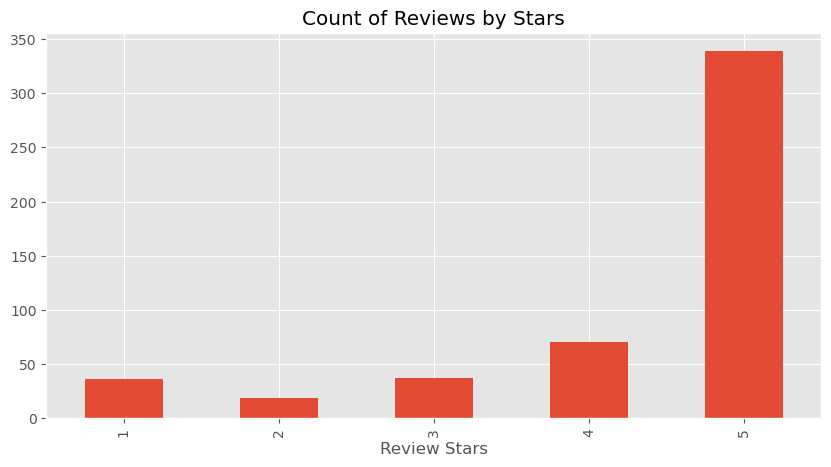

In [5]:
# Este código genera un gráfico de barras que muestra la cantidad de reseñas para cada puntuación de estrellas.

# Contar ocurrencias de cada puntaje y ordenarlos
ax = df['Score'].value_counts().sort_index().plot(  
    kind='bar',  # Tipo de gráfico: barras
    title='Count of Reviews by Stars',  # Título del gráfico
    figsize=(10, 5))  # Tamaño de la figura en pulgadas (ancho x alto)

# Etiqueta del eje X
ax.set_xlabel('Review Stars')

# Mostrar el gráfico
plt.show()


In [7]:
example = df['Text'][10]
print(example)


I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [9]:
example = df['Text'][50]
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [11]:
import nltk
print(nltk.data.path)

['C:\\Users\\Orfeo/nltk_data', 'C:\\Users\\Orfeo\\anaconda3\\nltk_data', 'C:\\Users\\Orfeo\\anaconda3\\share\\nltk_data', 'C:\\Users\\Orfeo\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Orfeo\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Orfeo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# Tokenizar el texto en palabras individuales usando NLTK (Natural Language Toolkit)
tokens = nltk.word_tokenize(example)

# Mostrar los primeros 10 tokens (palabras) de la lista resultante
# Esto es útil para inspeccionar una muestra del resultado de la tokenización
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Orfeo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
# Etiquetar las palabras tokenizadas con sus partes del discurso (POS tagging)
tagged = nltk.pos_tag(tokens)

tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [21]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Orfeo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Orfeo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [23]:
# Realizar el reconocimiento de entidades nombradas (NER) usando NLTK
entities = nltk.chunk.ne_chunk(tagged)

# 'pprint()' muestra la estructura de árbol de las entidades nombradas de manera organizada
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Orfeo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
# Importar el analizador de sentimientos de NLTK (Sentiment Intensity Analyzer)
# Este analizador permite calcular la polaridad del sentimiento (positivo, negativo, neutro) en un texto.
from nltk.sentiment import SentimentIntensityAnalyzer

# Crear una instancia del analizador de sentimientos
sia = SentimentIntensityAnalyzer()

text = "I love using NLTK for natural language processing. It's amazing!"

# Analizar el sentimiento del texto
sentiment = sia.polarity_scores(text)

print(sentiment)

# neg: Puntuación de sentimiento negativo (0.0 en este caso, lo que indica que no hay negatividad).
# neu: Puntuación de sentimiento neutro (0.297).
# pos: Puntuación de sentimiento positivo (0.703).
# compound: Puntuación compuesta que resume el sentimiento general (0.8225, que indica un sentimiento positivo fuerte).

{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.8955}


In [29]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [31]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [33]:
sia.polarity_scores(example)


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [35]:
!pip install tqdm


In [37]:
!pip install --upgrade ipywidgets


In [41]:
# Importar tqdm para mostrar una barra de progreso en entornos de notebook
from tqdm.auto import tqdm

# Crear un diccionario vacío para almacenar los resultados del análisis de sentimientos
res = {}

# Iterar sobre cada fila del DataFrame 'df' usando tqdm para mostrar una barra de progreso
# 'df.iterrows()' devuelve el índice y la fila como una serie
# 'total=len(df)' indica a tqdm el número total de iteraciones para la barra de progreso
for i, row in tqdm(df.iterrows(), total=len(df)):
    # Obtener el texto de la columna 'Text' en la fila actual
    text = row['Text']
    
    # Obtener el ID de la columna 'Id' en la fila actual
    myid = row['Id']
    
    # Calcular el análisis de sentimiento del texto usando el analizador 'sia'
    # 'sia.polarity_scores(text)' devuelve un diccionario con las puntuaciones de sentimiento
    res[myid] = sia.polarity_scores(text)

# Convertir el diccionario de resultados en un DataFrame
# 'pd.DataFrame(res)' crea un DataFrame donde las claves del diccionario son las columnas
# '.T' transpone el DataFrame para que los IDs sean las filas y las puntuaciones sean las columnas
vaders = pd.DataFrame(res).T

# Reiniciar el índice del DataFrame y renombrar la columna de índice a 'Id'
# 'reset_index()' convierte el índice en una columna
# 'rename(columns={'index': 'Id'})' renombra la columna de índice a 'Id'
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Combinar el DataFrame de puntuaciones de sentimiento con el DataFrame original 'df'
# 'merge(df, how='left')' realiza una combinación izquierda usando la columna 'Id' como clave
vaders = vaders.merge(df, how='left')

vaders.head()

  0%|          | 0/500 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


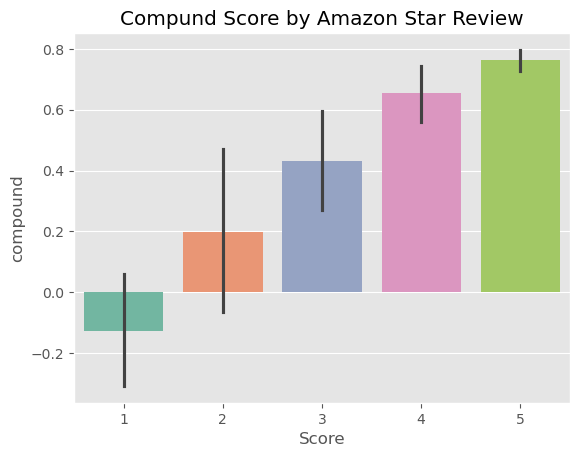

In [45]:
palette = sns.color_palette("Set2", 5)
ax = sns.barplot(data=vaders, x='Score', y='compound', hue='Score', palette=palette, legend=False)
ax.set_title('Compund Score by Amazon Star Review')
plt.show()


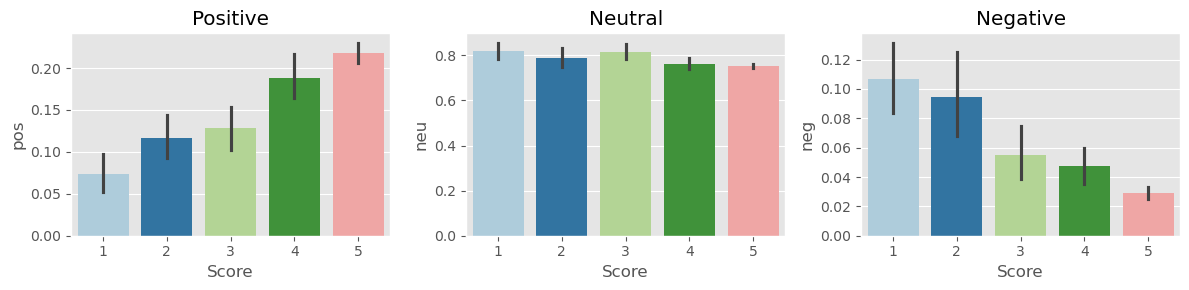

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Definir una paleta de colores personalizada
# Puedes usar cualquier paleta de Seaborn o definir una lista de colores
palette = sns.color_palette("Paired", 5)  # "husl" es una paleta con colores distintos

# Gráfico de positivos
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], hue='Score', palette=palette, legend=False)
axs[0].set_title('Positive')

# Gráfico de neutrales
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], hue='Score', palette=palette, legend=False)
axs[1].set_title('Neutral')

# Gráfico de negativos
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], hue='Score', palette=palette, legend=False)
axs[2].set_title('Negative')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar las gráficas
plt.show()


In [49]:
# Importar las clases necesarias de la biblioteca Hugging Face Transformers
# 'AutoTokenizer' se utiliza para cargar el tokenizador asociado a un modelo preentrenado.
# 'AutoModelForSequenceClassification' se utiliza para cargar un modelo preentrenado para clasificación de secuencias.
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Importar la función 'softmax' de SciPy
# 'softmax' se utiliza para convertir las salidas del modelo en probabilidades.
from scipy.special import softmax

# Especificar el nombre del modelo preentrenado que se va a utilizar
# En este caso, se utiliza el modelo "cardiffnlp/twitter-roberta-base-sentiment",
# que está diseñado para análisis de sentimientos en textos de Twitter.
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# El tokenizador convierte el texto en tokens que el modelo puede procesar.
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Cargar el modelo preentrenado para clasificación de secuencias
# Este modelo está diseñado para predecir sentimientos (positivo, negativo, neutro).
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [51]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [53]:
# Roberta Model
# Es el texto que se pasará al modelo para obtener las predicciones.
encoded_text = tokenizer(example, return_tensors='pt')
# 'tokenizer' convierte el texto (ej. 'example') en una secuencia de tokens (números) que el modelo puede procesar.
# 'return_tensors' especifica el formato de salida de los tensores. En este caso, se pide el formato 'pt' que corresponde a PyTorch.
# El resultado es un diccionario que contiene las secuencias de entrada tokenizadas.

# Salida del modelo cuando se pasa el texto tokenizado.
output = model(**encoded_text)
# El modelo toma los tensores tokenizados como entrada.
# El operador '**' pasa los valores de las claves del diccionario 'encoded_text' como argumentos para el modelo.
# El resultado de 'output' es una tupla que contiene las puntuaciones de cada clase (por ejemplo, negativo, neutral, positivo).

# El índice '[0]' se refiere a las puntuaciones de la primera instancia de entrada.
# 'detach()' desconecta el tensor de su historial de cálculo (es decir, elimina cualquier dependencia de gradientes de PyTorch).
# '.numpy()' convierte el tensor de PyTorch en un arreglo de NumPy, que es más fácil de manipular.
scores = output[0][0].detach().numpy()

# 'softmax(scores)' aplica la función softmax sobre las puntuaciones para obtener probabilidades.
# La función softmax convierte las puntuaciones en valores entre 0 y 1, asegurando que la suma de todas las probabilidades sea 1.
scores = softmax(scores)

# Se crea un diccionario que almacena las probabilidades para las clases:
scores_dict = {
    'roberta_neg' : scores[0],  # Probabilidad de la clase negativa
    'roberta_neu' : scores[1],  # Probabilidad de la clase neutral
    'roberta_pos' : scores[2]   # Probabilidad de la clase positiva
}

print(scores_dict)


{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573692}


In [55]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

res = {}

# Iterar sobre cada fila del DataFrame
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # Obtener el texto de la columna 'Text' en la fila actual
        text = row['Text']
        
        # Obtener el ID de la columna 'Id' en la fila actual
        myid = row['Id']
        
        # Calcular el análisis de sentimiento utilizando el analizador VADER
        vader_result = sia.polarity_scores(text)
        # 'sia.polarity_scores(text)' calcula las puntuaciones de sentimiento utilizando el analizador VADER
        # El resultado es un diccionario con las puntuaciones de las categorías: 'neg', 'neu', 'pos', 'compound'
        
        # Crear un diccionario para renombrar las claves del resultado de VADER
        vader_result_rename = {}
        # Iterar sobre las claves y valores del resultado de VADER
        for key, value in vader_result.items():
            # Renombrar las claves de VADER para agregar un prefijo 'vader_'
            vader_result_rename[f"vader_{key}"] = value
        
        # Calcular el análisis de sentimiento utilizando el modelo Roberta
        roberta_result = polarity_scores_roberta(text)
        # 'polarity_scores_roberta(text)' devuelve un diccionario con las puntuaciones de sentimiento del modelo Roberta
        
        # Combinar los resultados de VADER y Roberta en un solo diccionario
        # El operador '**' combina ambos diccionarios, creando un solo diccionario con las puntuaciones de ambas técnicas
        both = {**vader_result_rename, **roberta_result}
        
        # Almacenar los resultados combinados en el diccionario 'res' usando el ID como clave
        res[myid] = both
    
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [57]:
# Convertir el diccionario 'res' en un DataFrame
results_df = pd.DataFrame(res).T
# '.T' transpone el DataFrame, de manera que los IDs (originalmente en las claves del diccionario) son ahora las filas
# Ahora cada fila en 'results_df' corresponde a un ID y sus respectivos resultados de análisis de sentimiento

# Reiniciar el índice del DataFrame y renombrar la columna de índice a 'Id'
# 'reset_index()' convierte el índice (que contiene los IDs) en una columna
# 'rename(columns={'index': 'Id'})' renombra la columna de índice a 'Id'
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# Combinar el DataFrame 'results_df' con el DataFrame original 'df'
# 'merge(df, how='left')' realiza una combinación a la izquierda usando la columna 'Id' como clave
results_df = results_df.merge(df, how='left')

results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

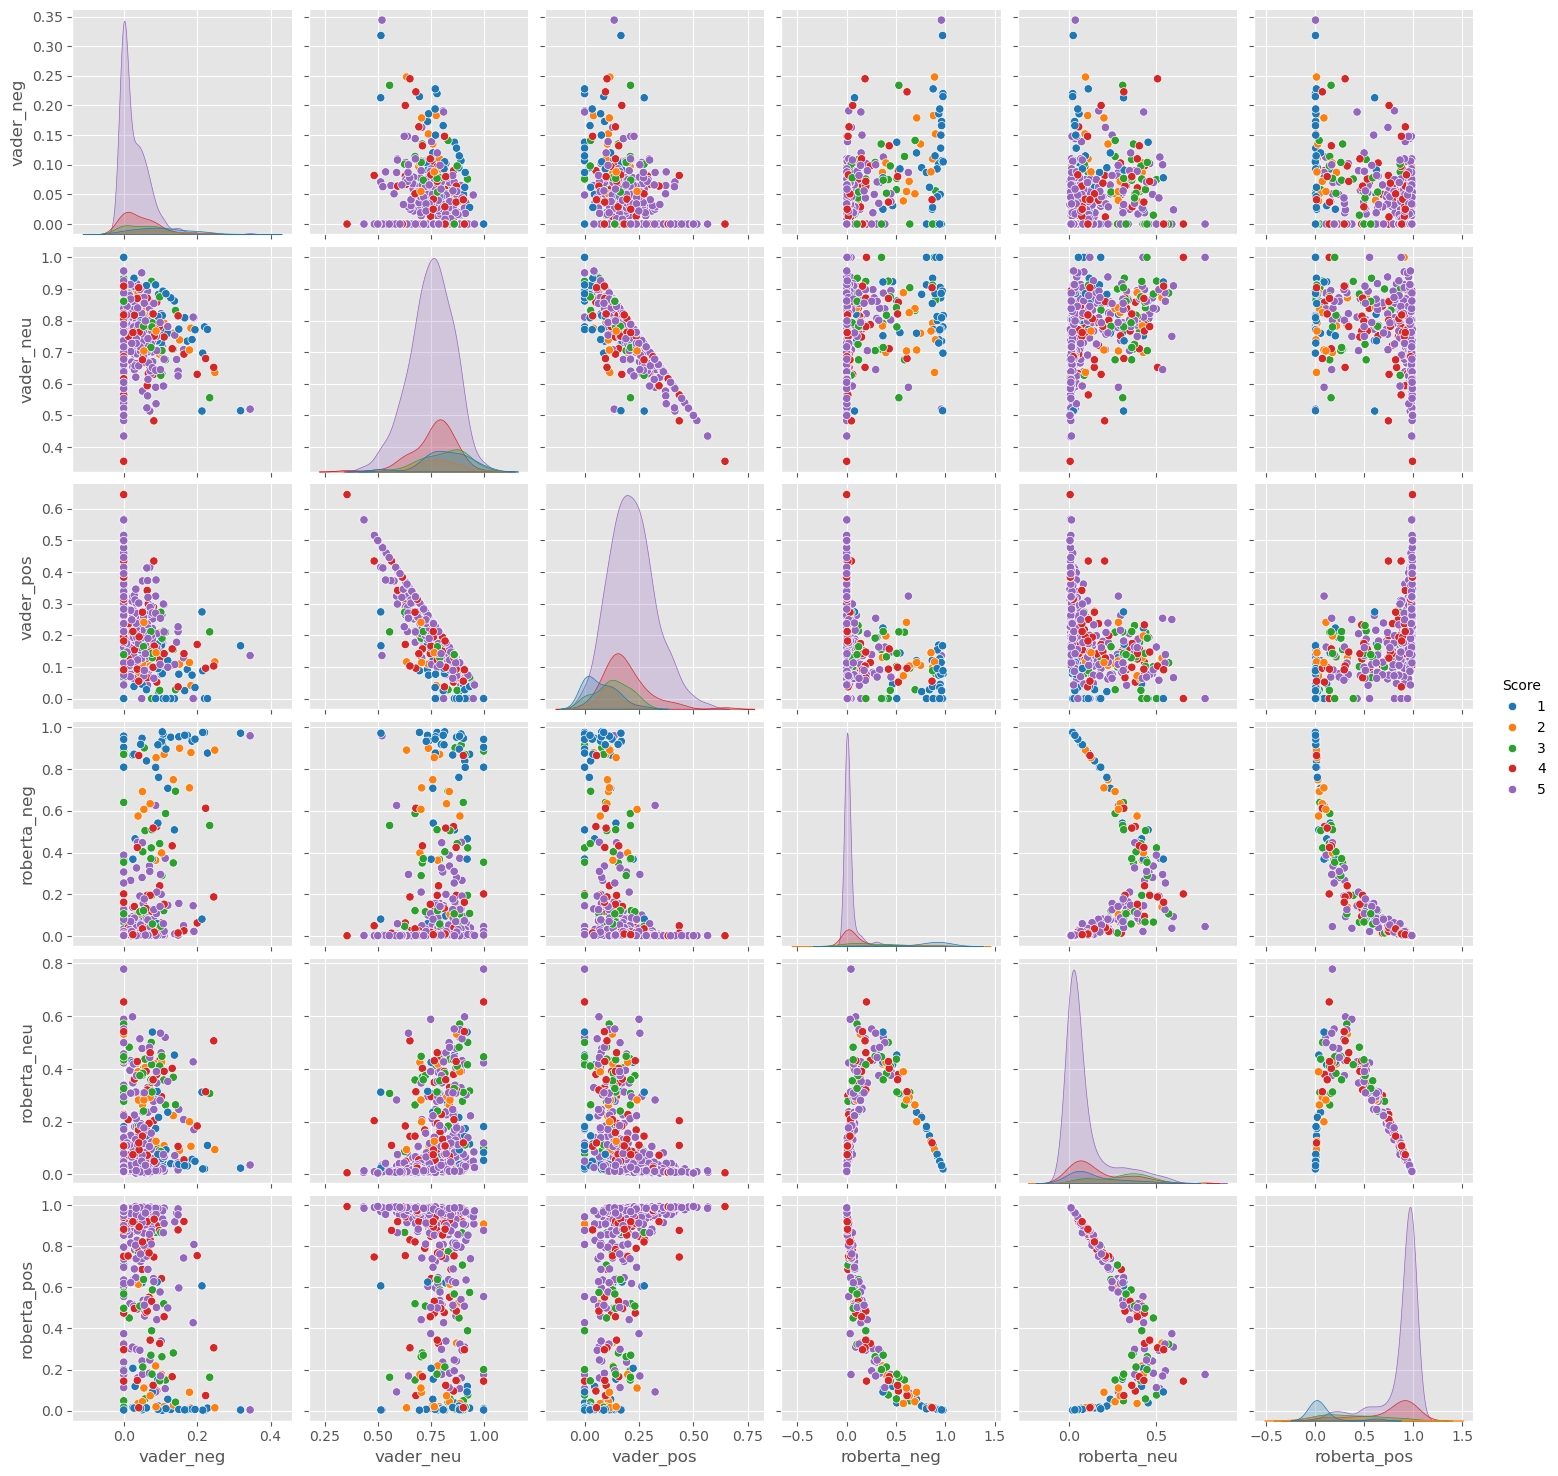

In [59]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [61]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]


'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [63]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]


'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [65]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [67]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [69]:
# Importar la función 'pipeline' de la librería 'transformers'
# 'pipeline' permite cargar modelos preentrenados para diversas tareas de NLP
from transformers import pipeline

# Crear un pipeline de análisis de sentimiento
# Se carga automáticamente un modelo preentrenado de sentiment analysis
sent_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\Orfeo\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Orfeo\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [71]:
sent_pipeline('I love sentiment analysis!')


[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [81]:
sent_pipeline("Don't forget to blink.")

[{'label': 'POSITIVE', 'score': 0.99958735704422}]

In [83]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]